In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#reading all database and store them in each variable
con = sqlite3.connect('olist.db')
order_items = pd.read_sql('SELECT * from olist_order_items_dataset', con)
customers = pd.read_sql('SELECT * from olist_order_customer_dataset', con)
geolocation = pd.read_sql('SELECT * from olist_geolocation_dataset', con)
order_payments = pd.read_sql('SELECT * from olist_order_payments_dataset', con)
order_reviews = pd.read_sql('SELECT * from olist_order_reviews_dataset', con)
orders = pd.read_sql('SELECT * from olist_order_dataset', con)
products = pd.read_sql('SELECT * from olist_products_dataset', con)
sellers = pd.read_sql('SELECT * from olist_sellers_dataset', con)

In [3]:
#creating a Class with three functions to clean data
@dataclass
class Cleaning:
    df : pd.DataFrame
        
    #Using upper and lower boundaries to define outliers and change their value using median
    def impute_outliers(self):
        columns = list(self.df.columns.values)
        for column in columns:
            try:
                q3 = self.df[column].quantile(q=0.75)
                q1 = self.df[column].quantile(q=0.25)
                iqr = q3 - q1
                upper_limit = q3 + iqr*1.5
                lower_limit = q1 - iqr*1.5
                median = self.df[column].median()
                self.df.loc[self.df[column]>upper_limit, column] = median
                self.df.loc[self.df[column]<lower_limit, column] = median
            except:
                pass
            
    #Change non-float null into 'unknown' and float null into median
    def impute_missing(self):
        columns = list(self.df.columns.values)
        for column in columns:
            try:
                if self.df[column].dtypes.name == 'float64':
                    median = self.df[column].median()
                    self.df[column] = self.df[column].fillna(median)
                else:
                    self.df[column] = self.df[column].fillna('unknown')
            except:
                pass
    
    #Drop duplicates
    def del_duplicate(self):
        self.df = self.df.drop_duplicates(keep='first')

In [4]:
#cleaning order_items
clean_order_items = Cleaning(order_items)
clean_order_items.impute_outliers()
clean_order_items.impute_missing()
clean_order_items.del_duplicate()
order_items.describe()

,index,order_item_id,price,freight_value
count,112650.000000,112650.0,112650.000000,112650.000000
mean,56324.500000,1.0,83.302553,16.140152
std,32519.398249,0.0,56.395857,5.165819
min,0.000000,1.0,0.850000,0.980000
25%,28162.250000,1.0,39.900000,13.150000
50%,56324.500000,1.0,74.990000,16.260000
75%,84486.750000,1.0,110.320000,18.310000
max,112649.000000,1.0,277.300000,33.250000


In [5]:
order_items.isnull().sum()

index                  0
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [8]:
#cleaning orders
clean_orders = Cleaning(orders)
clean_orders.impute_outliers()
clean_orders.impute_missing()
clean_orders.del_duplicate()
orders.describe()

,index
count,99441.000000
mean,49720.000000
std,28706.288396
min,0.000000
25%,24860.000000
50%,49720.000000
75%,74580.000000
max,99440.000000


In [9]:
orders.isnull().sum()

index                            0
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [10]:
#cleaning products
clean_products = Cleaning(products)
clean_products.impute_outliers()
clean_products.impute_missing()
clean_products.del_duplicate()
products.describe()

,index,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,16475.000000,48.831143,643.932840,1.972444,862.235865,28.345725,14.401566,21.975297
std,9512.278697,9.682505,396.698866,1.353229,817.004369,12.490756,8.689810,9.744499
min,0.000000,20.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,8237.500000,43.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,16475.000000,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,24712.500000,57.000000,837.000000,3.000000,1050.000000,35.000000,20.000000,28.000000
max,32950.000000,76.000000,1920.000000,6.000000,4300.000000,68.000000,40.000000,52.000000


In [11]:
products.isnull().sum()

index                         0
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [12]:
#cleaning order_payments
clean_order_payments = Cleaning(order_payments)
clean_order_payments.impute_outliers()
clean_order_payments.impute_missing()
clean_order_payments.del_duplicate()
order_payments.describe()

,index,payment_sequential,payment_installments,payment_value
count,103886.00000,103886.0,103886.000000,103886.000000
mean,51942.50000,1.0,2.297721,109.289114
std,29989.44937,0.0,1.944211,69.984641
min,0.00000,1.0,0.000000,0.000000
25%,25971.25000,1.0,1.000000,56.790000
50%,51942.50000,1.0,1.000000,100.000000
75%,77913.75000,1.0,3.000000,144.560000
max,103885.00000,1.0,8.000000,344.340000


In [13]:
order_payments.isnull().sum()

index                   0
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [14]:
#cleaning order_reviews
clean_order_order_reviews = Cleaning(order_reviews)
clean_order_order_reviews.impute_outliers()
clean_order_order_reviews.impute_missing()
clean_order_order_reviews.del_duplicate()
order_reviews.describe()

,index,review_score
count,99224.000000,99224.000000
mean,49611.500000,4.642224
std,28643.645892,0.628200
min,0.000000,3.000000
25%,24805.750000,4.000000
50%,49611.500000,5.000000
75%,74417.250000,5.000000
max,99223.000000,5.000000


In [15]:
order_reviews.isnull().sum()

index                      0
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [16]:
#cleaning sellers
clean_order_sellers = Cleaning(sellers)
clean_order_sellers.impute_outliers()
clean_order_sellers.impute_missing()
clean_order_sellers.del_duplicate()
sellers.describe()

,index,seller_zip_code_prefix
count,3095.000000,3095.000000
mean,1547.000000,32291.059451
std,893.593867,32713.453830
min,0.000000,1001.000000
25%,773.500000,7093.500000
50%,1547.000000,14940.000000
75%,2320.500000,64552.500000
max,3094.000000,99730.000000


In [17]:
sellers.isnull().sum()

index                     0
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [18]:
#cleaning customers
clean_customers = Cleaning(customers)
clean_customers.impute_outliers()
clean_customers.impute_missing()
clean_customers.del_duplicate()
customers.describe()

,index,customer_zip_code_prefix
count,99441.000000,99441.000000
mean,49720.000000,35137.474583
std,28706.288396,29797.938996
min,0.000000,1003.000000
25%,24860.000000,11347.000000
50%,49720.000000,24416.000000
75%,74580.000000,58900.000000
max,99440.000000,99990.000000


In [19]:
customers.isnull().sum()

index                       0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [20]:
#cleaning geolocation
clean_geolocation = Cleaning(geolocation)
clean_geolocation.impute_outliers()
clean_geolocation.impute_missing()
clean_geolocation.del_duplicate()
geolocation.describe()

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06,1.000163e+06
mean,5.000810e+05,3.657417e+04,-2.257642e+01,-4.644455e+01
std,2.887223e+05,3.054934e+04,2.284500e+00,3.438666e+00
min,0.000000e+00,1.001000e+03,-2.903899e+01,-5.578114e+01
25%,2.500405e+05,1.107500e+04,-2.355650e+01,-4.834441e+01
50%,5.000810e+05,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,7.501215e+05,6.350400e+04,-2.215363e+01,-4.395480e+01
max,1.000162e+06,9.999000e+04,-1.454380e+01,-3.656031e+01


In [21]:
geolocation.isnull().sum()

index                          0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [22]:
products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [24]:
order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1.0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2.0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3.0,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4.0,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
orders.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [26]:
#joining order_items, products, order_reviews, and order payments to create order_total as a total database for further analysis
order_total = order_items.merge(orders, on='order_id').merge(products, on='product_id').merge(order_reviews, on='order_id').merge(order_payments, on='order_id')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15924\1423096025.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  order_total = order_items.merge(orders, on='order_id').merge(products, on='product_id').merge(order_reviews, on='order_id').merge(order_payments, on='order_id')


In [27]:
order_total.head()

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,customer_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,index,payment_sequential,payment_type,payment_installments,payment_value
0,0.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,85267,3ce436f183e68e07877b285a838db11a,...,5,unknown,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,85283.0,1,credit_card,2,72.19
1,8346.0,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,64197,e6eecc5a77de221464d1c4eaff0a9b64,...,5,unknown,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,39274.0,1,boleto,1,73.86
2,36646.0,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,10214,4ef55bf80f711b372afebcb7c715344a,...,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,87067.0,1,credit_card,2,83.23
3,49108.0,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,59155,30407a72ad8b3f4df4d15369126b20c9,...,5,unknown,unknown,2017-08-10 00:00:00,2017-08-13 03:35:17,47987.0,1,credit_card,3,75.07
4,55021.0,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,41473,91a792fef70ecd8cc69d3c7feb3d12da,...,5,unknown,unknown,2017-08-25 00:00:00,2017-08-28 00:51:18,38405.0,1,credit_card,4,72.19


In [28]:
order_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index_x                        117329 non-null  float64
 1   order_id                       117329 non-null  object 
 2   order_item_id                  117329 non-null  int64  
 3   product_id                     117329 non-null  object 
 4   seller_id                      117329 non-null  object 
 5   shipping_limit_date            117329 non-null  object 
 6   price                          117329 non-null  float64
 7   freight_value                  117329 non-null  float64
 8   index_y                        117329 non-null  int64  
 9   customer_id                    117329 non-null  object 
 10  order_status                   117329 non-null  object 
 11  order_purchase_timestamp       117329 non-null  object 
 12  order_approved_at             

In [29]:
order_total = order_total.drop(['index', 'index_x', 'index_y'], axis=1)

In [30]:
order_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   order_item_id                  117329 non-null  int64  
 2   product_id                     117329 non-null  object 
 3   seller_id                      117329 non-null  object 
 4   shipping_limit_date            117329 non-null  object 
 5   price                          117329 non-null  float64
 6   freight_value                  117329 non-null  float64
 7   customer_id                    117329 non-null  object 
 8   order_status                   117329 non-null  object 
 9   order_purchase_timestamp       117329 non-null  object 
 10  order_approved_at              117329 non-null  object 
 11  order_delivered_carrier_date   117329 non-null  object 
 12  order_delivered_customer_date 

In [31]:
order_total.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,97ca439bc427b48bc1cd7177abe71365,5,unknown,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1,credit_card,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,b11cba360bbe71410c291b764753d37f,5,unknown,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,1,boleto,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,1,credit_card,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,8304ff37d8b16b57086fa283fe0c44f8,5,unknown,unknown,2017-08-10 00:00:00,2017-08-13 03:35:17,1,credit_card,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,426f43a82185969503fb3c86241a9535,5,unknown,unknown,2017-08-25 00:00:00,2017-08-28 00:51:18,1,credit_card,4,72.19


In [32]:
#converting data columns into datetype values

to_date = list(order_total.columns[[4,9,10,11,12,13,26,27]].values)
order_total[to_date] = order_total[to_date].apply(pd.to_datetime, errors='coerce')

In [33]:
order_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   order_item_id                  117329 non-null  int64         
 2   product_id                     117329 non-null  object        
 3   seller_id                      117329 non-null  object        
 4   shipping_limit_date            117329 non-null  datetime64[ns]
 5   price                          117329 non-null  float64       
 6   freight_value                  117329 non-null  float64       
 7   customer_id                    117329 non-null  object        
 8   order_status                   117329 non-null  object        
 9   order_purchase_timestamp       117329 non-null  datetime64[ns]
 10  order_approved_at              117314 non-null  datetime64[ns]
 11  

In [34]:
order_total = order_total.dropna()

In [35]:
order_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114842 entries, 0 to 117328
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114842 non-null  object        
 1   order_item_id                  114842 non-null  int64         
 2   product_id                     114842 non-null  object        
 3   seller_id                      114842 non-null  object        
 4   shipping_limit_date            114842 non-null  datetime64[ns]
 5   price                          114842 non-null  float64       
 6   freight_value                  114842 non-null  float64       
 7   customer_id                    114842 non-null  object        
 8   order_status                   114842 non-null  object        
 9   order_purchase_timestamp       114842 non-null  datetime64[ns]
 10  order_approved_at              114842 non-null  datetime64[ns]
 11  

In [36]:
#Adding some order properties regarding time dimension
order_total['order_purchase_hr'] = order_total['order_purchase_timestamp'].dt.hour
order_total['order_purchase_day'] = order_total['order_purchase_timestamp'].dt.day
order_total['order_purchase_month'] = order_total['order_purchase_timestamp'].dt.month
order_total['order_purchase_year'] = order_total['order_purchase_timestamp'].dt.year
order_total['order_purchase_dayofweek'] = order_total['order_purchase_timestamp'].dt.dayofweek
order_total['order_delivery_time'] = ((order_total['order_delivered_customer_date'] - order_total['order_purchase_timestamp'])/np.timedelta64(1, 'D')).astype(int)
order_total['order_estimation_time_gap'] = ((order_total['order_delivered_customer_date'] - order_total['order_estimated_delivery_date'])/np.timedelta64(1, 'D')).astype(int)
order_total['order_process_time'] = ((order_total['order_delivered_carrier_date'] - order_total['order_purchase_timestamp'])/np.timedelta64(1, 'D')).astype(int)
order_total['order_carrier_time'] = ((order_total['order_delivered_customer_date'] - order_total['order_delivered_carrier_date'])/np.timedelta64(1, 'D')).astype(int)
order_total['review_process_time'] = ((order_total['review_answer_timestamp'] - order_total['review_creation_date'])/np.timedelta64(1, 'D')).astype(int)

In [37]:
order_total.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_purchase_hr,order_purchase_day,order_purchase_month,order_purchase_year,order_purchase_dayofweek,order_delivery_time,order_estimation_time_gap,order_process_time,order_carrier_time,review_process_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,8,13,9,2017,2,7,-8,6,1,1
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,11,28,6,2017,2,15,-12,7,8,3
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,10,18,5,2018,4,17,-2,5,12,1
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,18,1,8,2017,1,8,-15,1,7,3
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,21,10,8,2017,3,13,-7,0,13,3


In [38]:
order_total.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_purchase_hr,order_purchase_day,order_purchase_month,order_purchase_year,order_purchase_dayofweek,order_delivery_time,order_estimation_time_gap,order_process_time,order_carrier_time,review_process_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,8,13,9,2017,2,7,-8,6,1,1
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,11,28,6,2017,2,15,-12,7,8,3
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,10,18,5,2018,4,17,-2,5,12,1
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,18,1,8,2017,1,8,-15,1,7,3
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,21,10,8,2017,3,13,-7,0,13,3


In [39]:
order_total[order_total['payment_type']=='not_defined']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_purchase_hr,order_purchase_day,order_purchase_month,order_purchase_year,order_purchase_dayofweek,order_delivery_time,order_estimation_time_gap,order_process_time,order_carrier_time,review_process_time


In [40]:
order_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114842 entries, 0 to 117328
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114842 non-null  object        
 1   order_item_id                  114842 non-null  int64         
 2   product_id                     114842 non-null  object        
 3   seller_id                      114842 non-null  object        
 4   shipping_limit_date            114842 non-null  datetime64[ns]
 5   price                          114842 non-null  float64       
 6   freight_value                  114842 non-null  float64       
 7   customer_id                    114842 non-null  object        
 8   order_status                   114842 non-null  object        
 9   order_purchase_timestamp       114842 non-null  datetime64[ns]
 10  order_approved_at              114842 non-null  datetime64[ns]
 11  

In [61]:
#show top five items based on total sales
top_items = order_total[['product_id', 'product_category_name', 'price']].groupby(['product_id', 'product_category_name'], as_index=False).sum().sort_values('price', ascending=False).head()
top_items.index = range(0,5,1)
top_items.rename(columns={'price':'sales'}, inplace=True)
top_items

,product_id,product_category_name,sales
0,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,47249.45
1,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,44700.76
2,3dd2a17168ec895c781a9191c1e95ad7,informatica_acessorios,41232.50
3,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,37687.63
4,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,37523.70


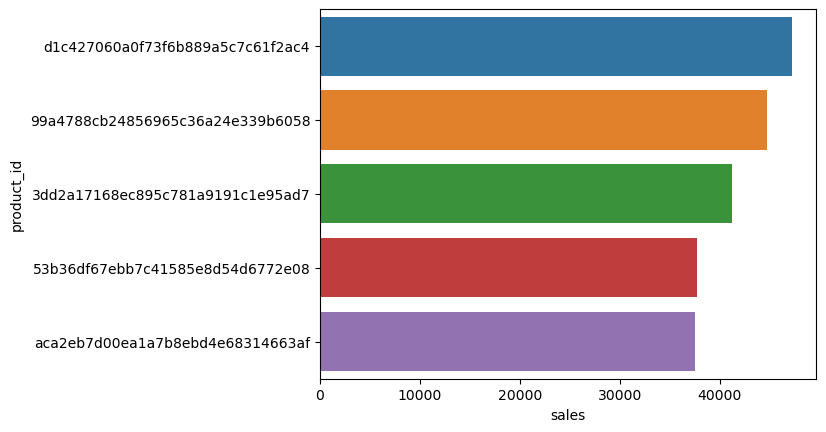

In [62]:
#create a barplot of sales of top five items
sns.barplot(data=top_items, x='sales', y='product_id')
plt.show()

In [59]:
#create a barplot of top five categories based on sales
top_cat = order_total[['product_category_name', 'price']].groupby(['product_category_name'], as_index=False).sum().sort_values('price', ascending=False).head()
top_cat.index = range(0,5,1)
top_cat.rename(columns={'price':'sales'}, inplace=True)
top_cat

,product_category_name,sales
0,cama_mesa_banho,1003591.30
1,beleza_saude,770031.89
2,esporte_lazer,756357.39
3,informatica_acessorios,709890.27
4,moveis_decoracao,659418.16


<AxesSubplot:xlabel='sales', ylabel='product_category_name'>

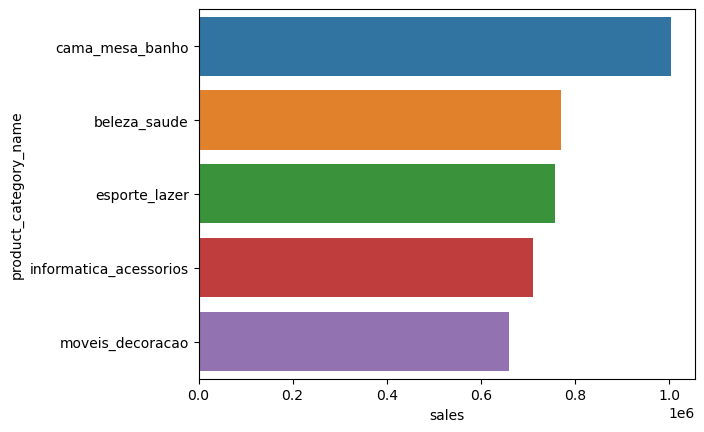

In [60]:
#create a barplot of top five categories based on sales
sns.barplot(data=top_cat, x='sales', y='product_category_name')

In [65]:
#showing total products based on number of photos they have
top_based_photos_qty = order_total[['product_photos_qty', 'product_id']].groupby(['product_photos_qty'], as_index=False).count().sort_values('product_id', ascending=False)
top_based_photos_qty.rename(columns={'product_id':'number_of_products'}, inplace=True)
top_based_photos_qty

,product_photos_qty,number_of_products
0,1.0,61925
1,2.0,22407
2,3.0,12618
3,4.0,8594
4,5.0,5462
5,6.0,3836


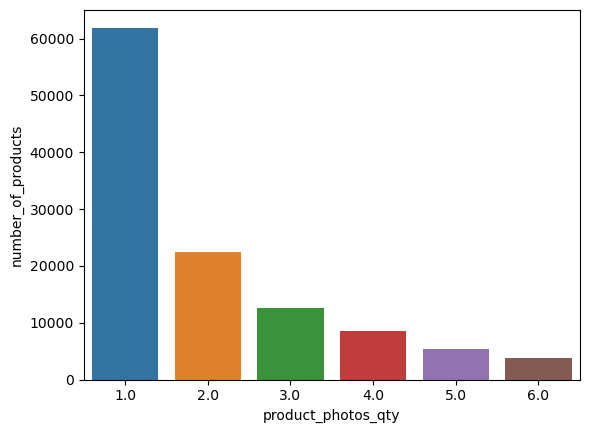

In [66]:
sns.barplot(data=top_based_photos_qty, x='product_photos_qty', y='number_of_products')
plt.show()

In [44]:
order_total.pivot_table(values='product_id', index='product_category_name', columns='product_photos_qty', aggfunc='count', fill_value=0,  margins=True).sort_values('All', ascending=False)

product_photos_qty,1.0,2.0,3.0,4.0,5.0,6.0,All
product_category_name,,,,,,,
All,61925,22407,12618,8594,5462,3836,114842
cama_mesa_banho,8691,1847,395,203,477,71,11684
beleza_saude,6403,1197,1150,390,294,315,9749
esporte_lazer,5179,1392,671,581,672,239,8734
moveis_decoracao,4340,1654,1029,624,256,651,8554
...,...,...,...,...,...,...,...
cds_dvds_musicais,0,14,0,0,0,0,14
portateis_cozinha_e_preparadores_de_alimentos,8,1,0,2,3,0,14
pc_gamer,0,0,3,6,0,0,9


In [67]:
#based on order_total, create an order_origin to add seller and customer identification
order_origin = order_total[['order_id','product_id', 'product_category_name', 'customer_id', 'seller_id', 'price', 'freight_value', 'review_score', 'order_purchase_hr', 'order_purchase_day', 'order_purchase_month', 'order_purchase_year', 'order_purchase_dayofweek', 'order_delivery_time', 'order_estimation_time_gap', 'order_process_time', 'order_carrier_time', 'review_process_time']].merge(customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id').merge(sellers[['seller_id', 'seller_city', 'seller_state']], on='seller_id')
order_origin.head()

,order_id,product_id,product_category_name,customer_id,seller_id,price,freight_value,review_score,order_purchase_hr,order_purchase_day,...,order_purchase_dayofweek,order_delivery_time,order_estimation_time_gap,order_process_time,order_carrier_time,review_process_time,customer_city,customer_state,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,3ce436f183e68e07877b285a838db11a,48436dade18ac8b2bce089ec2a041202,58.9,13.29,5,8,13,...,2,7,-8,6,1,1,campos dos goytacazes,RJ,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,48436dade18ac8b2bce089ec2a041202,55.9,17.96,5,11,28,...,2,15,-12,7,8,3,jatai,GO,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,4ef55bf80f711b372afebcb7c715344a,48436dade18ac8b2bce089ec2a041202,64.9,18.33,4,10,18,...,4,17,-2,5,12,1,belo horizonte,MG,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,30407a72ad8b3f4df4d15369126b20c9,48436dade18ac8b2bce089ec2a041202,58.9,16.17,5,18,1,...,1,8,-15,1,7,3,sao jose dos pinhais,PR,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da,48436dade18ac8b2bce089ec2a041202,58.9,13.29,5,21,10,...,3,13,-7,0,13,3,conselheiro lafaiete,MG,volta redonda,SP


In [68]:
order_origin.pivot_table(values='price', index='product_category_name', columns='customer_state', aggfunc='sum', fill_value=0, margins=True).sort_values('All', ascending=False)

customer_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,All
product_category_name,,,,,,,,,,,,,,,,,,,,,
All,9512.23,41792.29,14586.93,8240.80,339386.14,132505.88,207551.26,195994.05,201070.70,73068.75,...,1277780.40,50615.13,25291.14,5069.63,539638.36,352804.19,34808.36,3852257.94,29249.33,9537922.29
cama_mesa_banho,567.70,1913.24,791.10,669.50,24546.02,6710.28,16463.99,22464.07,22695.43,4088.32,...,145319.57,2889.12,1732.27,609.70,56418.35,30060.11,1812.17,460358.00,1010.83,1003591.30
beleza_saude,933.67,5343.02,1810.02,1105.67,33598.16,14033.33,20216.14,12807.70,18855.47,7578.48,...,85910.07,5684.50,2467.40,510.71,35688.35,25935.30,3470.59,312192.82,3029.05,770031.89
esporte_lazer,1203.45,3915.78,1322.49,887.69,29563.22,8841.33,21442.72,17114.63,14666.33,6063.12,...,96088.07,2231.52,2016.95,1350.60,43064.15,32759.04,3027.52,301592.54,2415.61,756357.39
informatica_acessorios,290.38,4074.29,1394.43,946.77,22448.63,8731.43,15782.39,12829.32,11216.36,5456.83,...,93276.97,2561.28,1656.57,163.79,46675.57,29193.51,4052.90,284387.11,1755.62,709890.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
casa_conforto_2,0.00,0.00,0.00,0.00,12.90,0.00,0.00,12.90,64.50,0.00,...,12.90,0.00,0.00,0.00,109.99,0.00,0.00,469.68,0.00,734.47
cds_dvds_musicais,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.00,...,90.00,0.00,0.00,0.00,225.00,0.00,0.00,350.00,0.00,730.00
portateis_cozinha_e_preparadores_de_alimentos,0.00,0.00,0.00,0.00,21.52,0.00,0.00,0.00,0.00,0.00,...,83.90,0.00,0.00,0.00,74.99,0.00,0.00,293.50,0.00,658.79


In [71]:
#show total sales based on seller state and categories
order_origin_sales = pd.DataFrame(order_origin.groupby(['seller_state', 'product_category_name'], as_index=False)['price'].sum())
order_origin_sales.rename(columns={'price':'total_sales', 'seller_state':'state'}, inplace=True)
order_origin_sales

,state,product_category_name,total_sales
0,AM,telefonia,302.99
1,BA,alimentos_bebidas,5522.05
2,BA,bebes,849.50
3,BA,bebidas,145.90
4,BA,beleza_saude,1303.79
...,...,...,...
498,SP,tablets_impressao_imagem,6820.33
499,SP,telefonia,140095.39
500,SP,telefonia_fixa,13752.50
501,SP,unknown,100174.31


In [70]:
#show total purchase based on customer state and categories
order_origin_purchase = pd.DataFrame(order_origin.groupby(['customer_state', 'product_category_name'], as_index=False)['price'].sum())
order_origin_purchase.rename(columns={'price':'total_purchase', 'customer_state':'state'}, inplace=True)
order_origin_purchase

,state,product_category_name,total_purchase
0,AC,artigos_de_natal,69.90
1,AC,automotivo,396.96
2,AC,bebes,384.83
3,AC,beleza_saude,933.67
4,AC,brinquedos,234.79
...,...,...,...
1378,TO,relogios_presentes,3299.86
1379,TO,telefonia,978.13
1380,TO,telefonia_fixa,85.98
1381,TO,unknown,227.99


In [72]:
#create a list of top five category sales
top_cat_list = list(top_cat['product_category_name'].values)
top_cat_list

['cama_mesa_banho',
 'beleza_saude',
 'esporte_lazer',
 'informatica_acessorios',
 'moveis_decoracao']

In [73]:
#create a list of top five state of sales with corresponding states
state_list = list(order_origin['seller_state'].values) + list(order_origin['customer_state'].values)
state_list = pd.DataFrame({'state': list(set(state_list))})
state_list.head()

,state
0,RR
1,MG
2,DF
3,GO
4,CE


In [74]:
#show sales origin (seller)
sales_origin = order_origin[['seller_state', 'price']].groupby(['seller_state'], as_index=False).sum().sort_values('price', ascending=False)
sales_origin.rename(columns={'price':'total_sales', 'seller_state':'state'}, inplace=True)
sales_origin.head()

,state,total_sales
21,SP,6509057.66
14,PR,803108.40
7,MG,785713.75
15,RJ,449686.77
19,SC,377807.91


In [75]:
#show purchase origin (customer)
purchase_origin = order_origin[['customer_state', 'price']].groupby(['customer_state'], as_index=False).sum().sort_values('price', ascending=False)
purchase_origin.rename(columns={'price':'total_purchase', 'customer_state':'state'}, inplace=True)
purchase_origin.head()

,state,total_purchase
25,SP,3852257.94
18,RJ,1277780.40
10,MG,1129733.10
22,RS,539638.36
17,PR,482525.30


In [76]:
#show total sales and purchase from top five states
order_origin_top_state = sales_origin.merge(purchase_origin, on='state', how='outer').fillna(0).head(5)
order_origin_top_state

,state,total_sales,total_purchase
0,SP,6509057.66,3852257.94
1,PR,803108.40,482525.30
2,MG,785713.75,1129733.10
3,RJ,449686.77,1277780.40
4,SC,377807.91,352804.19


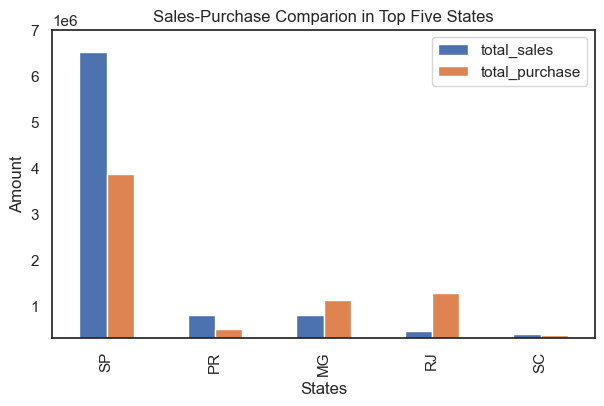

In [189]:
#create a barplot showing difference between sales and purchase from top five states
order_origin_top_state.plot(x='state', kind='bar', figsize=(7,4), grid=False)
plt.xlabel("States")
plt.ylabel("Amount")
plt.title("Sales-Purchase Comparion in Top Five States")
plt.ylim(300000,7000000)
plt.legend()
plt.show()

In [78]:
top_state_list = list(order_origin_top_state['state'].values)
top_state_list

['SP', 'PR', 'MG', 'RJ', 'SC']

In [80]:
#create a pivot showing top sales and purchase broken down into state and category
order_origin_top_cat = order_origin_sales.merge(order_origin_purchase, on=['state', 'product_category_name'], how='outer').fillna(0)
order_origin_top_cat = order_origin_top_cat.loc[(order_origin_top_cat['state'].isin(top_state_list)) & (order_origin_top_cat['product_category_name'].isin(top_cat_list))].reset_index().drop('index', axis=1)
order_origin_top_cat

,state,product_category_name,total_sales,total_purchase
0,MG,beleza_saude,36204.33,90748.11
1,MG,cama_mesa_banho,27696.31,125882.77
2,MG,esporte_lazer,37514.45,81934.04
3,MG,informatica_acessorios,142467.76,89968.49
4,MG,moveis_decoracao,55344.70,73526.85
5,PR,beleza_saude,55782.52,32359.64
6,PR,cama_mesa_banho,11923.50,44067.24
7,PR,esporte_lazer,133411.88,41311.73
8,PR,informatica_acessorios,175353.32,35662.20
9,PR,moveis_decoracao,105577.61,42589.76


In [81]:
min(order_origin_top_cat['total_purchase'].min(), order_origin_top_cat['total_sales'].min())

4074.21

In [82]:
top_state_list

['SP', 'PR', 'MG', 'RJ', 'SC']

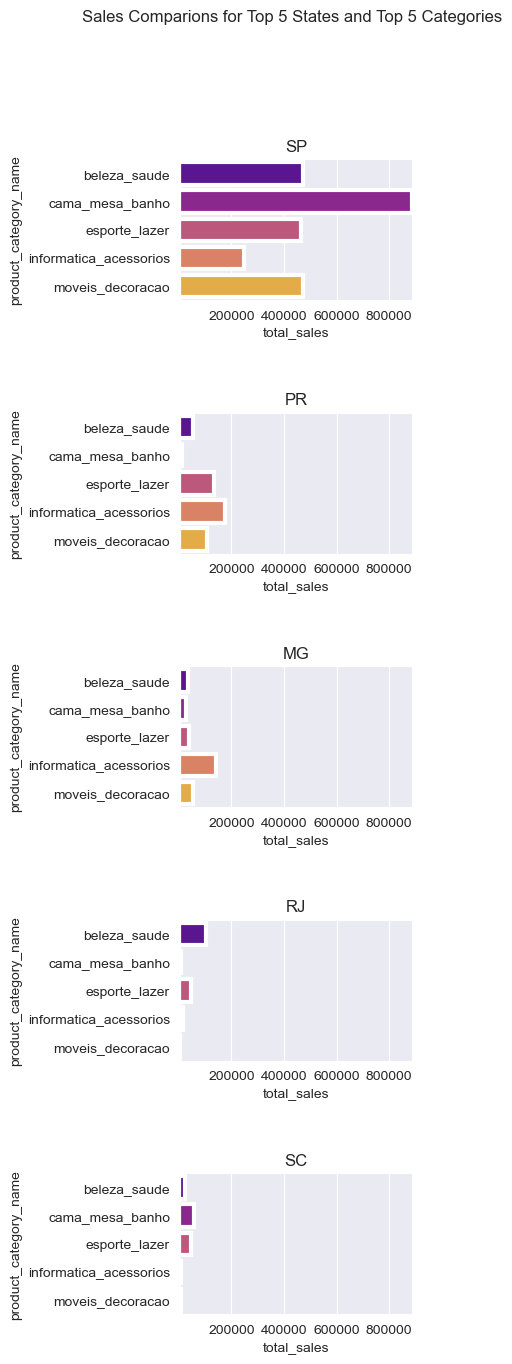

In [84]:
#creating plots showing sales comparison of top five categories in top five states
sns.set_style('darkgrid')
fig, axes = plt.subplots(5, 1, figsize=(3,15))
fig.suptitle('Sales Comparions for Top 5 States and Top 5 Categories')



for i, state in enumerate(top_state_list):
    sns.barplot(data=order_origin_top_cat[order_origin_top_cat['state']==state], x ='total_sales', y = 'product_category_name',
                    palette='plasma',
                    lw=3, ax=axes[i])
    xmin = order_origin_top_cat['total_sales'].min()
    xmax = order_origin_top_cat['total_sales'].max()
    axes[i].set_title(str(state))
    axes[i].set_xlim(xmin,xmax)
plt.subplots_adjust(hspace = 0.8)

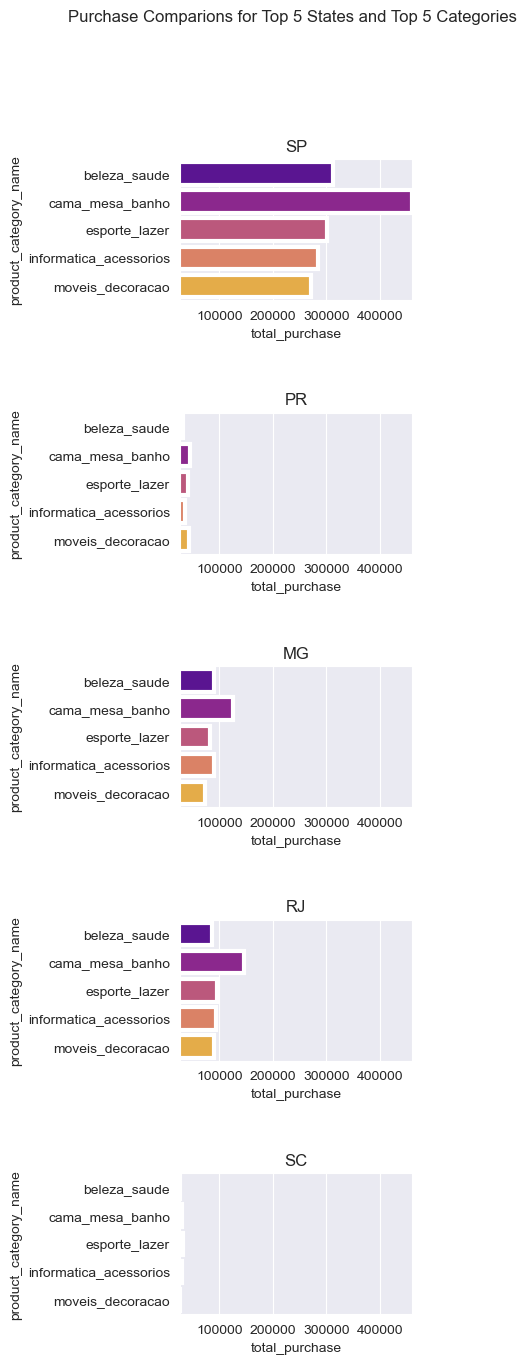

In [85]:
#creating plots showing purchase comparison of top five categories in top five states
sns.set_style('darkgrid')
fig, axes = plt.subplots(5, 1, figsize=(3,15))
fig.suptitle('Purchase Comparions for Top 5 States and Top 5 Categories')


for i, state in enumerate(top_state_list):
    sns.barplot(data=order_origin_top_cat[order_origin_top_cat['state']==state], x ='total_purchase', y = 'product_category_name',
                    palette='plasma',
                    lw=3, ax=axes[i])
    xmin = order_origin_top_cat['total_purchase'].min()
    xmax = order_origin_top_cat['total_purchase'].max()
    axes[i].set_title(str(state))
    axes[i].set_xlim(xmin,xmax)
plt.subplots_adjust(hspace = 0.8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


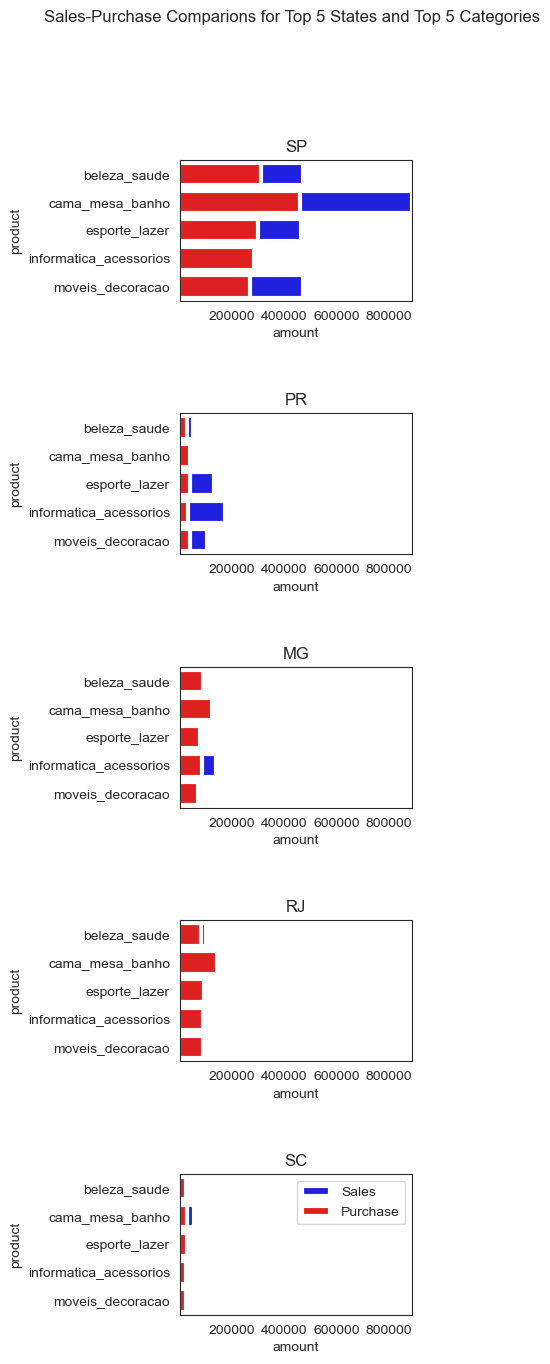

In [106]:
sns.set_style('white')
fig, axes = plt.subplots(5, 1, figsize=(3,15))
fig.suptitle('Sales-Purchase Comparions for Top 5 States and Top 5 Categories')


for i, state in enumerate(top_state_list):
    ax = plt.subplots
    ax = sns.barplot(data=order_origin_top_cat[order_origin_top_cat['state']==state], x ='total_sales', y = 'product_category_name',
                    lw=3, ax=axes[i], color='b', label='Sales')
    ax = sns.barplot(data=order_origin_top_cat[order_origin_top_cat['state']==state], x ='total_purchase', y = 'product_category_name',
                    lw=3, ax=axes[i], color='r', label='Purchase')
    xmin = min(order_origin_top_cat['total_purchase'].min(), order_origin_top_cat['total_sales'].min())
    xmax = max(order_origin_top_cat['total_purchase'].max(), order_origin_top_cat['total_sales'].max())
    axes[i].set_title(str(state))
    axes[i].set_xlim(xmin,xmax)
    ax.set(xlabel='amount', ylabel="product")
    plt.legend(bbox_to_anchor=(1, 1)) #create legend
plt.subplots_adjust(hspace = 0.8)

In [107]:
order_total.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_purchase_hr,order_purchase_day,order_purchase_month,order_purchase_year,order_purchase_dayofweek,order_delivery_time,order_estimation_time_gap,order_process_time,order_carrier_time,review_process_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,8,13,9,2017,2,7,-8,6,1,1
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,11,28,6,2017,2,15,-12,7,8,3
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,10,18,5,2018,4,17,-2,5,12,1
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,18,1,8,2017,1,8,-15,1,7,3
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,21,10,8,2017,3,13,-7,0,13,3


In [108]:
order_time_hourly = pd.DataFrame(order_total.groupby(['order_purchase_hr', 'order_purchase_year'])['order_id'].count())
order_time_hourly.head()

order_id
order_purchase_hr order_purchase_year          
0                 2016                        8
                  2017                     1331
                  2018                     1485
1                 2016                        1
                  2017                      659

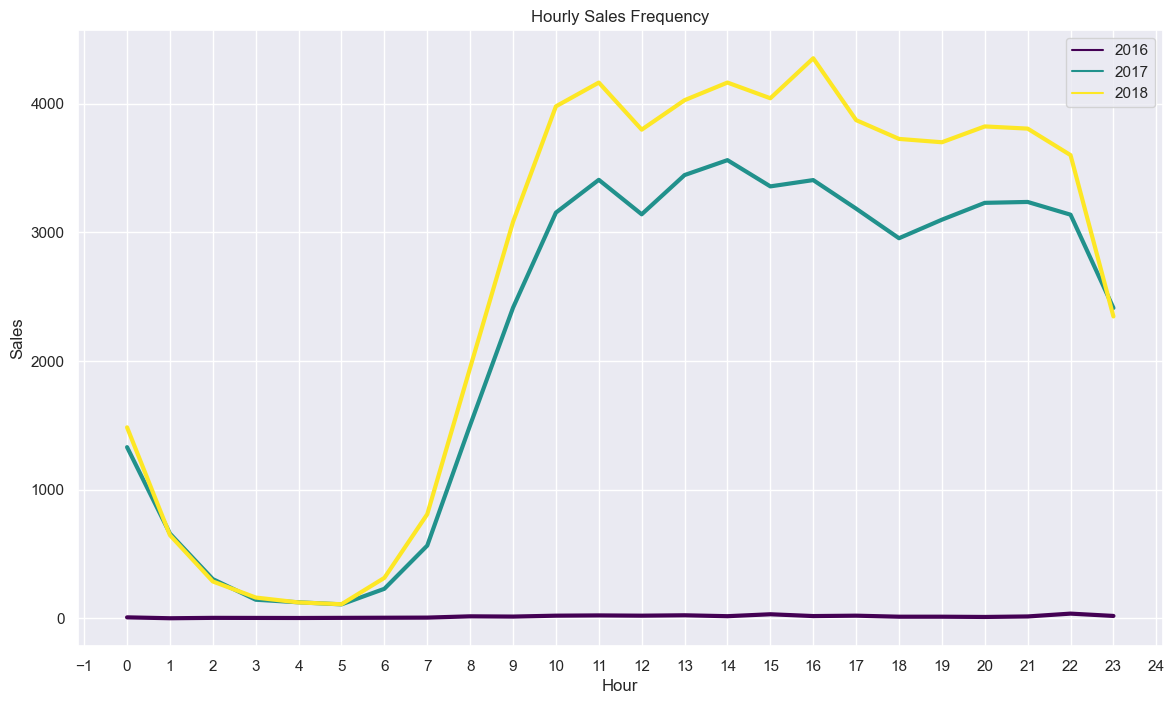

In [109]:
#create a lineplot showing sales based on hour of the day
sns.set_style('darkgrid') # style 
sns.set(rc={'figure.figsize':(14,8)}) #mengatur ukuran gambar

ax = sns.lineplot(data=order_time_hourly, x ='order_purchase_hr', y = 'order_id',
                  hue='order_purchase_year', palette='Set2',
                  legend='full', lw=3) #membuat lineplot

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) #mengatur sumbu x bertambah 1
plt.title('Hourly Sales Frequency')
plt.legend(bbox_to_anchor=(1, 1)) #membuat legend
plt.ylabel('Sales')
plt.xlabel('Hour')
plt.show()

In [110]:
order_time_daily = pd.DataFrame(order_total.groupby(['order_purchase_dayofweek', 'order_purchase_year'])['order_id'].count())
order_time_daily.head()

order_id
order_purchase_dayofweek order_purchase_year          
0                        2016                       51
                         2017                     8253
                         2018                    10318
1                        2016                       70
                         2017                     8403

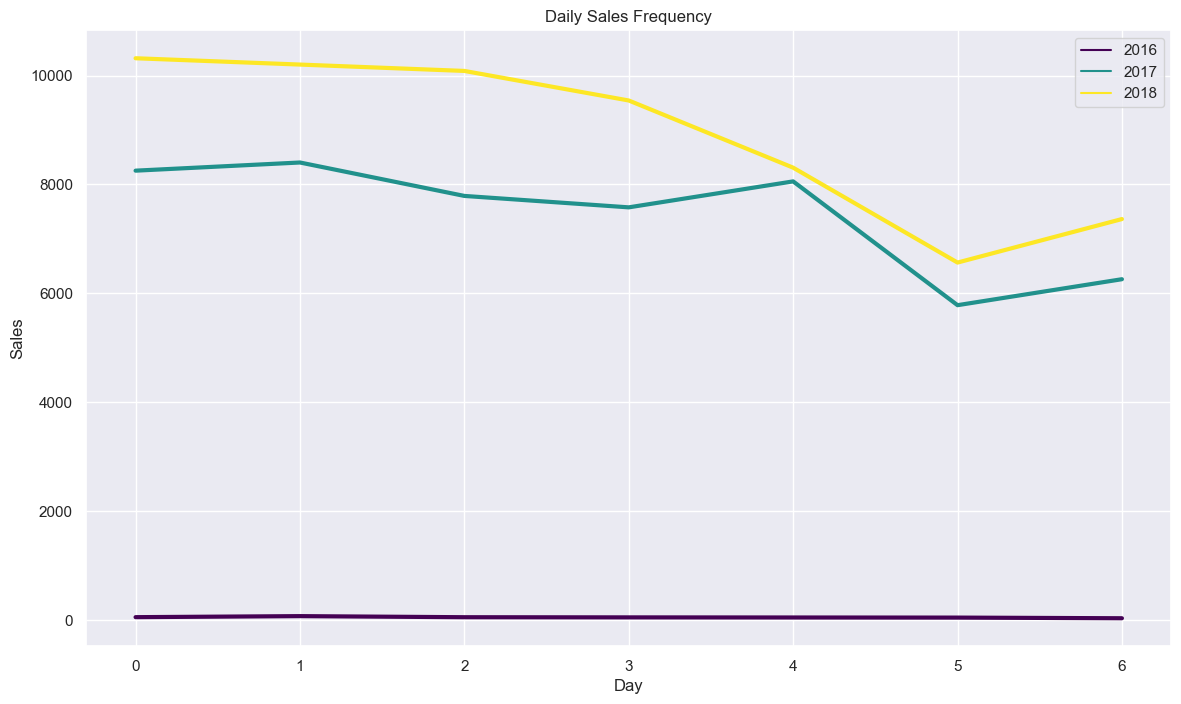

In [111]:
#create a lineplot showing sales based on day of the week
sns.set_style('darkgrid') # style 
sns.set(rc={'figure.figsize':(14,8)}) #mengatur ukuran gambar

ax = sns.lineplot(data=order_time_daily, x ='order_purchase_dayofweek', y = 'order_id',
                  hue='order_purchase_year', palette='Set2',
                  legend='full', lw=3) #membuat lineplot

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) #mengatur sumbu x bertambah 1
plt.title('Daily Sales Frequency')
plt.legend(bbox_to_anchor=(1, 1)) #membuat legend
plt.ylabel('Sales')
plt.xlabel('Day')
plt.show()

In [112]:
order_time_monthly = pd.DataFrame(order_total.groupby(['order_purchase_month', 'order_purchase_year'])['order_id'].count())
order_time_monthly.head()

order_id
order_purchase_month order_purchase_year          
1                    2017                      968
                     2018                     8348
2                    2017                     1946
                     2018                     7794
3                    2017                     3072

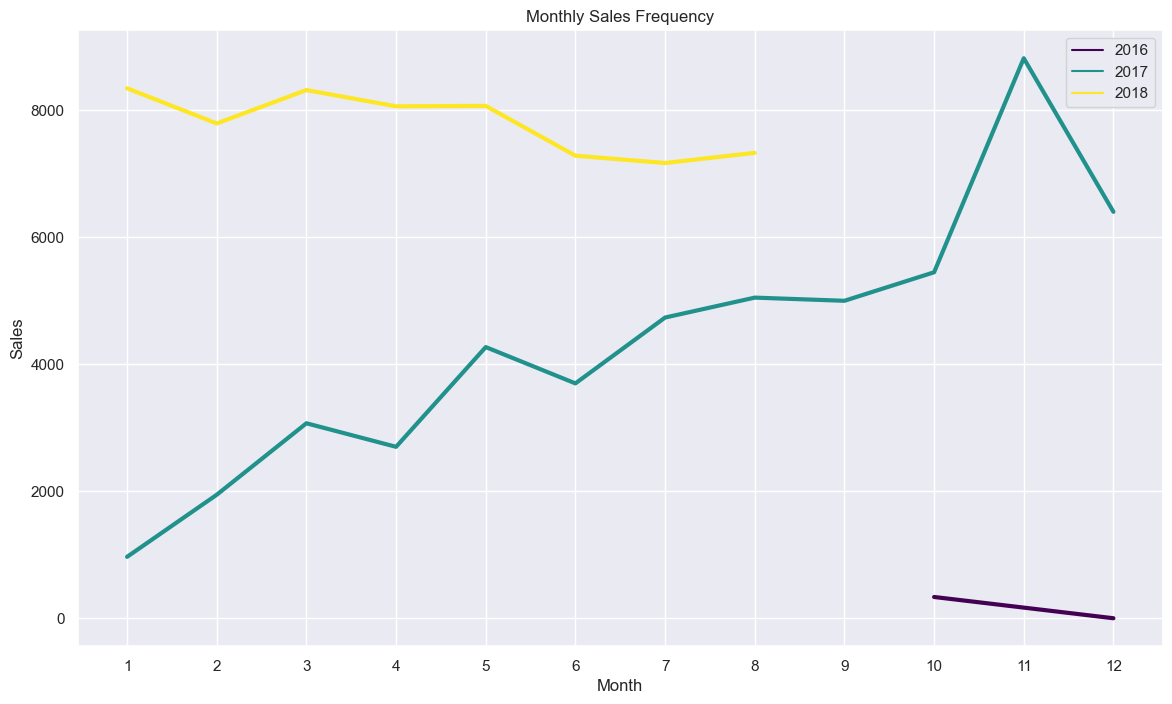

In [113]:
#create a lineplot showing sales based on month
sns.set_style('darkgrid') # style 
sns.set(rc={'figure.figsize':(14,8)}) #mengatur ukuran gambar

ax = sns.lineplot(data=order_time_monthly, x ='order_purchase_month', y = 'order_id',
                  hue='order_purchase_year', palette='Set2',
                  legend='full', lw=3) #membuat lineplot

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) #mengatur sumbu x bertambah 1
plt.title('Monthly Sales Frequency')
plt.legend(bbox_to_anchor=(1, 1)) #membuat legend
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

In [114]:
order_origin.head()

,order_id,product_id,product_category_name,customer_id,seller_id,price,freight_value,review_score,order_purchase_hr,order_purchase_day,...,order_purchase_dayofweek,order_delivery_time,order_estimation_time_gap,order_process_time,order_carrier_time,review_process_time,customer_city,customer_state,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,3ce436f183e68e07877b285a838db11a,48436dade18ac8b2bce089ec2a041202,58.9,13.29,5,8,13,...,2,7,-8,6,1,1,campos dos goytacazes,RJ,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,48436dade18ac8b2bce089ec2a041202,55.9,17.96,5,11,28,...,2,15,-12,7,8,3,jatai,GO,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,4ef55bf80f711b372afebcb7c715344a,48436dade18ac8b2bce089ec2a041202,64.9,18.33,4,10,18,...,4,17,-2,5,12,1,belo horizonte,MG,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,30407a72ad8b3f4df4d15369126b20c9,48436dade18ac8b2bce089ec2a041202,58.9,16.17,5,18,1,...,1,8,-15,1,7,3,sao jose dos pinhais,PR,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da,48436dade18ac8b2bce089ec2a041202,58.9,13.29,5,21,10,...,3,13,-7,0,13,3,conselheiro lafaiete,MG,volta redonda,SP


In [115]:
#create a pivot of sales hourly frequency based on customer state and category
order_hr_origin_cat = pd.DataFrame(order_origin.groupby(['order_purchase_hr', 'customer_state', 'product_category_name'], as_index=False)['order_id'].count())
order_hr_origin_cat

,order_purchase_hr,customer_state,product_category_name,order_id
0,0,AC,beleza_saude,1
1,0,AC,fashion_bolsas_e_acessorios,1
2,0,AC,moveis_decoracao,1
3,0,AC,telefonia,1
4,0,AL,brinquedos,1
...,...,...,...,...
12286,23,TO,beleza_saude,3
12287,23,TO,esporte_lazer,2
12288,23,TO,ferramentas_jardim,1
12289,23,TO,malas_acessorios,1


In [117]:
order_hr_top_origin_cat = order_hr_origin_cat.loc[(order_hr_origin_cat['customer_state'].isin(top_state_list) & order_hr_origin_cat['product_category_name'].isin(top_cat_list))].reset_index().drop('index', axis=1)
order_hr_top_origin_cat.sort_values('order_id', ascending=False)

,order_purchase_hr,customer_state,product_category_name,order_id
311,13,SP,cama_mesa_banho,411
336,14,SP,cama_mesa_banho,379
386,16,SP,cama_mesa_banho,372
486,20,SP,cama_mesa_banho,365
261,11,SP,cama_mesa_banho,365
...,...,...,...,...
88,4,MG,moveis_decoracao,1
91,4,RJ,esporte_lazer,1
131,6,SC,beleza_saude,1
123,6,PR,beleza_saude,1


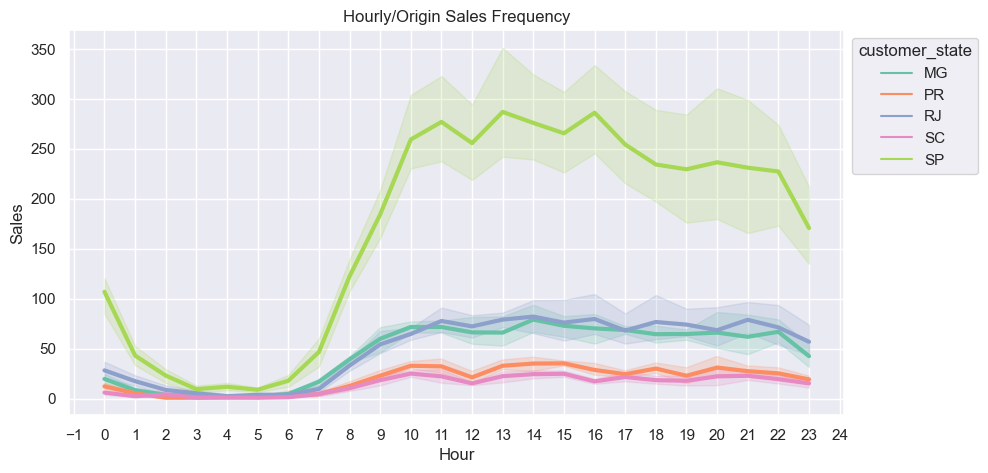

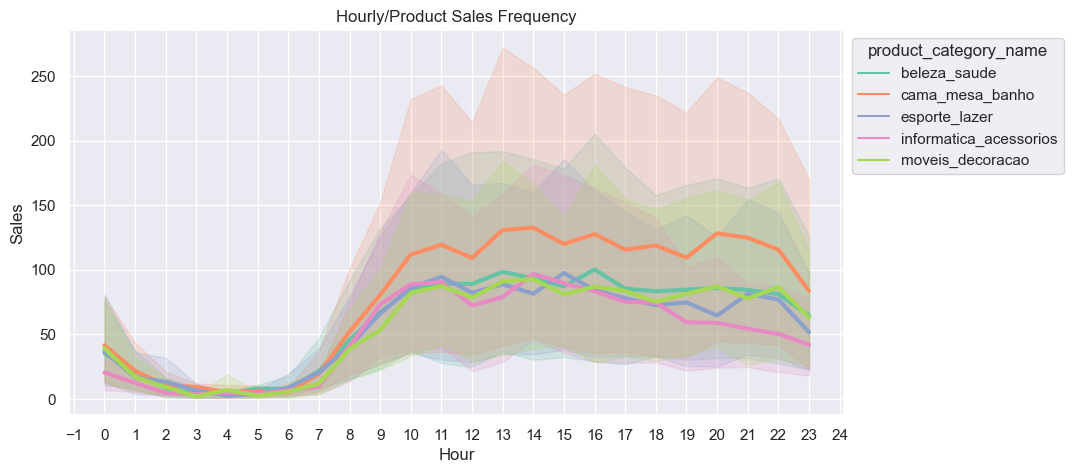

In [191]:
#showing lineplot of top states and top categrories based on hour frequecncy
sns.set_style('darkgrid') # style 
sns.set(rc={'figure.figsize':(10,5)}) #mengatur ukuran gambar

ax = sns.lineplot(data=order_hr_top_origin_cat, x ='order_purchase_hr', y = 'order_id',
                  hue='customer_state', palette='Set2',
                  legend='full', lw=3) #membuat lineplot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) #mengatur sumbu x bertambah 1
plt.title('Hourly/Origin Sales Frequency')
# plt.legend(bbox_to_anchor=(1, 1)) #membuat legend
plt.ylabel('Sales')
plt.xlabel('Hour')
plt.show()

ax = sns.lineplot(data=order_hr_top_origin_cat, x ='order_purchase_hr', y = 'order_id',
                  hue='product_category_name', palette='Set2',
                  legend='full', lw=3) #membuat lineplot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) #mengatur sumbu x bertambah 1
plt.title('Hourly/Product Sales Frequency')
# plt.legend(bbox_to_anchor=(1, 1)) #membuat legend
plt.ylabel('Sales')
plt.xlabel('Hour')
plt.show()

In [118]:
#create a pivot of sales daily  frequency based on customer state and category
order_dayofweek_origin_cat = pd.DataFrame(order_origin.groupby(['order_purchase_dayofweek', 'customer_state', 'product_category_name'], as_index=False)['order_id'].count())
order_dayofweek_top_origin_cat = order_dayofweek_origin_cat.loc[(order_dayofweek_origin_cat['customer_state'].isin(top_state_list) & order_dayofweek_origin_cat['product_category_name'].isin(top_cat_list))].reset_index().drop('index', axis=1)
order_dayofweek_top_origin_cat.sort_values('order_id', ascending=False)
order_dayofweek_top_origin_cat

,order_purchase_dayofweek,customer_state,product_category_name,order_id
0,0,MG,beleza_saude,160
1,0,MG,cama_mesa_banho,206
2,0,MG,esporte_lazer,168
3,0,MG,informatica_acessorios,179
4,0,MG,moveis_decoracao,167
...,...,...,...,...
170,6,SP,beleza_saude,528
171,6,SP,cama_mesa_banho,673
172,6,SP,esporte_lazer,431
173,6,SP,informatica_acessorios,318


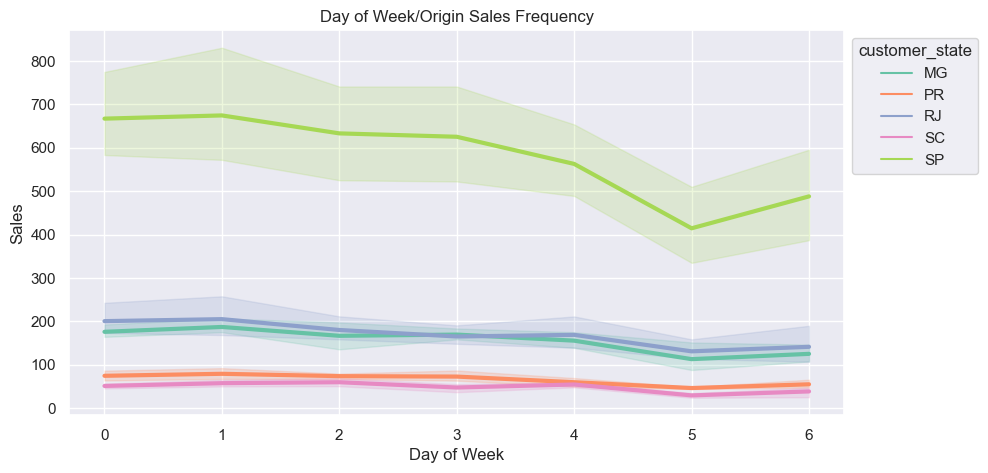

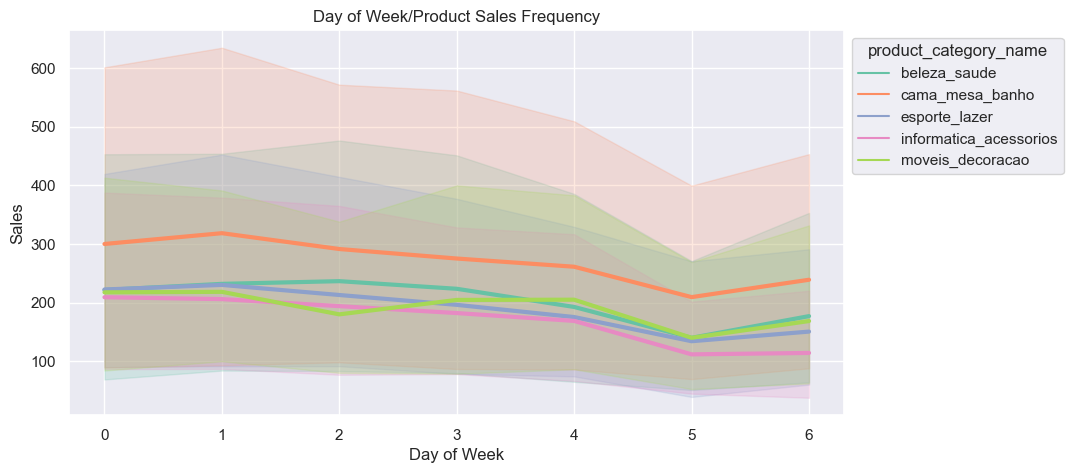

In [192]:
#showing lineplot of top states and top categrories based on day of week frequecncy
sns.set_style('darkgrid') # style 
sns.set(rc={'figure.figsize':(10,5)}) #mengatur ukuran gambar

ax = sns.lineplot(data=order_dayofweek_top_origin_cat, x ='order_purchase_dayofweek', y = 'order_id',
                  hue='customer_state', palette='Set2',
                  legend='full', lw=3) #membuat lineplot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) #mengatur sumbu x bertambah 1
plt.title('Day of Week/Origin Sales Frequency')
plt.ylabel('Sales')
plt.xlabel('Day of Week')
plt.show()

ax = sns.lineplot(data=order_dayofweek_top_origin_cat, x ='order_purchase_dayofweek', y = 'order_id',
                  hue='product_category_name', palette='Set2',
                  legend='full', lw=3) #membuat lineplot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) #mengatur sumbu x bertambah 1
plt.title('Day of Week/Product Sales Frequency')
plt.ylabel('Sales')
plt.xlabel('Day of Week')
plt.show()

In [121]:
order_day_origin_cat = pd.DataFrame(order_origin.groupby(['order_purchase_day', 'customer_state', 'product_category_name'], as_index=False)['order_id'].count())
order_day_top_origin_cat = order_day_origin_cat.loc[(order_day_origin_cat['customer_state'].isin(top_state_list) & order_day_origin_cat['product_category_name'].isin(top_cat_list))].reset_index().drop('index', axis=1)
order_day_top_origin_cat.sort_values('order_id', ascending=False)
order_day_top_origin_cat

,order_purchase_day,customer_state,product_category_name,order_id
0,1,MG,beleza_saude,30
1,1,MG,cama_mesa_banho,38
2,1,MG,esporte_lazer,30
3,1,MG,informatica_acessorios,31
4,1,MG,moveis_decoracao,31
...,...,...,...,...
770,31,SP,beleza_saude,61
771,31,SP,cama_mesa_banho,90
772,31,SP,esporte_lazer,63
773,31,SP,informatica_acessorios,67


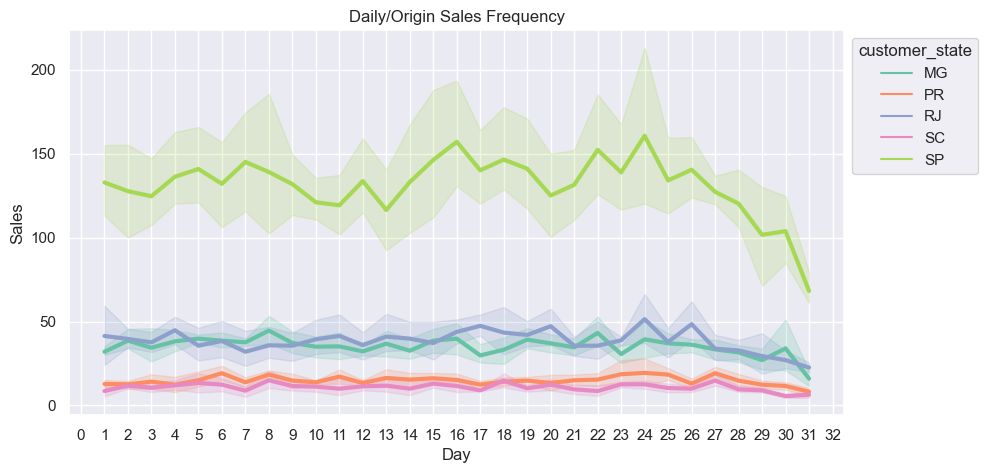

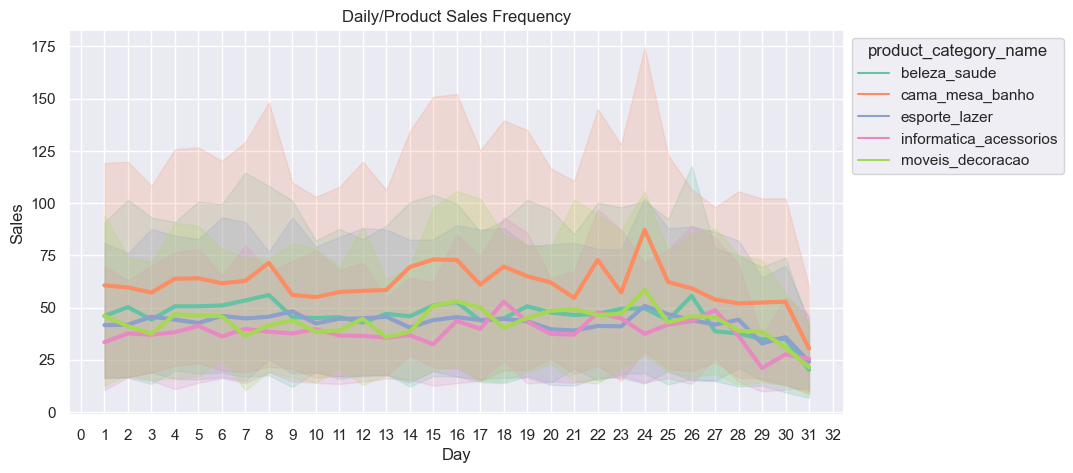

In [193]:
#showing lineplot of top states and top categrories based on day frequecncy
sns.set_style('darkgrid') # style 
sns.set(rc={'figure.figsize':(10,5)}) #mengatur ukuran gambar

ax = sns.lineplot(data=order_day_top_origin_cat, x ='order_purchase_day', y = 'order_id',
                  hue='customer_state', palette='Set2',
                  legend='full', lw=3) #membuat lineplot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) #mengatur sumbu x bertambah 1
plt.title('Daily/Origin Sales Frequency')
plt.ylabel('Sales')
plt.xlabel('Day')
plt.show()

ax = sns.lineplot(data=order_day_top_origin_cat, x ='order_purchase_day', y = 'order_id',
                  hue='product_category_name', palette='Set2',
                  legend='full', lw=3) #membuat lineplot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) #mengatur sumbu x bertambah 1
plt.title('Daily/Product Sales Frequency')
plt.ylabel('Sales')
plt.xlabel('Day')
plt.show()

In [123]:
order_origin.head()

,order_id,product_id,product_category_name,customer_id,seller_id,price,freight_value,review_score,order_purchase_hr,order_purchase_day,...,order_purchase_dayofweek,order_delivery_time,order_estimation_time_gap,order_process_time,order_carrier_time,review_process_time,customer_city,customer_state,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,3ce436f183e68e07877b285a838db11a,48436dade18ac8b2bce089ec2a041202,58.9,13.29,5,8,13,...,2,7,-8,6,1,1,campos dos goytacazes,RJ,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,48436dade18ac8b2bce089ec2a041202,55.9,17.96,5,11,28,...,2,15,-12,7,8,3,jatai,GO,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,4ef55bf80f711b372afebcb7c715344a,48436dade18ac8b2bce089ec2a041202,64.9,18.33,4,10,18,...,4,17,-2,5,12,1,belo horizonte,MG,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,30407a72ad8b3f4df4d15369126b20c9,48436dade18ac8b2bce089ec2a041202,58.9,16.17,5,18,1,...,1,8,-15,1,7,3,sao jose dos pinhais,PR,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da,48436dade18ac8b2bce089ec2a041202,58.9,13.29,5,21,10,...,3,13,-7,0,13,3,conselheiro lafaiete,MG,volta redonda,SP


In [126]:
#create a pivot showing mean delivery time from each states to each states
delivery_time = order_origin.pivot_table(values='order_delivery_time', index='seller_state', columns='customer_state', aggfunc='mean', margins=True).sort_values('All', ascending=False)
delivery_time

customer_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,All
seller_state,,,,,,,,,,,,,,,,,,,,,
AM,NaN,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.333333
MA,15.000000,29.750000,15.000000,28.000000,19.818182,12.666667,15.678571,28.000000,20.823529,10.066667,...,16.809524,21.000000,NaN,NaN,18.588235,16.000000,29.000000,15.543307,23.000000,17.182500
CE,NaN,19.000000,138.000000,NaN,19.333333,5.888889,9.000000,18.333333,13.000000,21.000000,...,16.800000,13.000000,25.000000,NaN,16.000000,20.500000,13.666667,15.153846,NaN,16.969697
RO,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,19.000000,NaN,NaN,...,19.000000,NaN,NaN,NaN,21.000000,NaN,36.000000,14.428571,NaN,16.928571
MT,NaN,NaN,NaN,NaN,13.750000,24.000000,10.285714,20.000000,11.363636,19.333333,...,14.642857,15.000000,14.666667,NaN,14.500000,16.333333,NaN,12.117647,NaN,14.232877
BA,66.000000,15.700000,33.000000,20.500000,10.853659,15.312500,11.210526,13.230769,17.384615,24.588235,...,12.715789,25.000000,28.000000,10.000000,13.723404,16.000000,16.444444,10.831395,15.500000,13.384389
PI,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,13.000000,NaN,13.272727
PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.666667,NaN,13.125000
SC,15.200000,22.181818,27.500000,29.750000,20.222222,27.347826,12.386667,13.754717,17.600000,22.590909,...,15.573770,18.857143,16.333333,NaN,12.099415,7.918033,22.411765,11.390695,19.333333,12.971195


<AxesSubplot:xlabel='customer_state', ylabel='seller_state'>

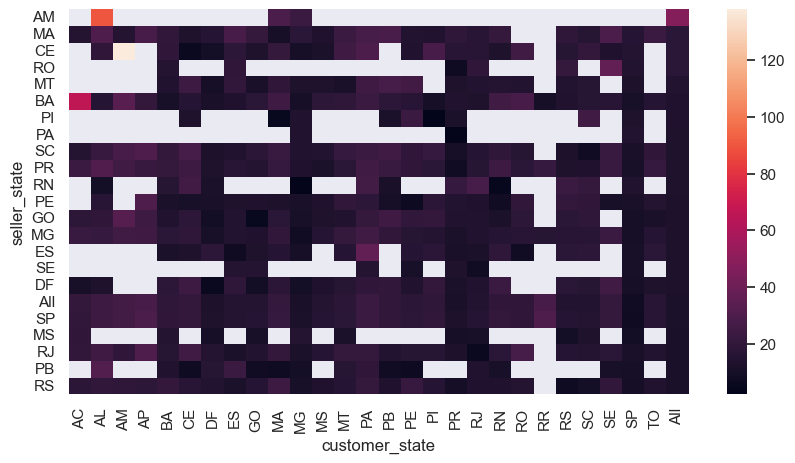

In [127]:
sns.heatmap(delivery_time)

In [128]:
delivery_time.describe()['All']

count    23.000000
mean     14.506592
std       7.366712
min      11.089246
25%      12.068420
50%      12.389978
75%      13.328558
max      47.333333
Name: All, dtype: float64

In [173]:
#showing pivot table of top customer states
delivery_time_top = order_origin[order_origin['customer_state'].isin(top_state_list)].pivot_table(values='order_delivery_time', index='seller_state', columns='customer_state', aggfunc='mean', margins=True).sort_values('All', ascending=False)
delivery_time_top

customer_state,MG,PR,RJ,SC,SP,All
seller_state,,,,,,
AM,23.000000,NaN,NaN,NaN,NaN,23.000000
RN,3.000000,21.500000,27.000000,21.000000,14.200000,18.076923
MA,17.030303,18.555556,16.809524,16.000000,15.543307,16.142857
CE,10.400000,16.600000,16.800000,20.500000,15.153846,15.375000
PI,14.000000,12.000000,NaN,25.000000,13.000000,15.166667
RO,NaN,7.000000,19.000000,NaN,14.428571,14.600000
MT,12.857143,13.125000,14.642857,16.333333,12.117647,13.132530
PA,14.000000,3.000000,NaN,NaN,14.666667,13.125000
PE,11.207792,14.555556,13.301887,19.000000,11.449541,12.132296


<AxesSubplot:xlabel='customer_state', ylabel='seller_state'>

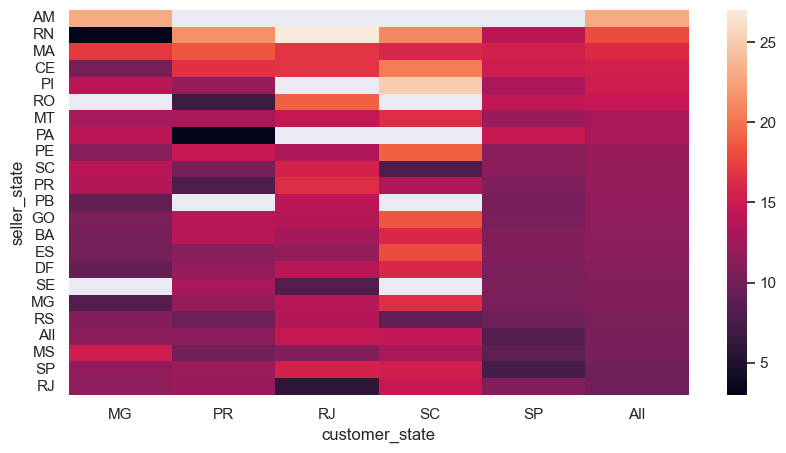

In [174]:
sns.heatmap(delivery_time_top)

In [129]:
#create a pivot showing mean estiamtion time gap from each states to each states
estimation_gap = order_origin.pivot_table(values='order_estimation_time_gap', index='seller_state', columns='customer_state', aggfunc='mean', margins=True).sort_values('All', ascending=False)
estimation_gap

customer_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,All
seller_state,,,,,,,,,,,,,,,,,,,,,
AM,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.333333
SP,-19.911765,-7.351916,-18.238938,-15.766667,-10.050841,-10.381706,-10.798517,-8.755675,-10.709133,-8.919786,...,-10.375279,-12.144304,-18.915842,-14.378378,-13.556281,-10.277338,-8.634146,-9.320648,-10.978632,-10.418243
PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.333333,NaN,-10.500000
MA,-32.000000,1.000000,-38.000000,-14.000000,-3.909091,-14.666667,-11.142857,-1.923077,-7.823529,-5.600000,...,-17.333333,-4.666667,NaN,NaN,-16.117647,-12.700000,1.200000,-9.196850,-2.500000,-10.562500
All,-20.212766,-7.880090,-18.911243,-17.719512,-10.197957,-10.497326,-11.233018,-9.878006,-11.393220,-9.251225,...,-11.203368,-12.840787,-19.010714,-17.434783,-13.287408,-10.782640,-9.263021,-10.309714,-11.642643,-11.160586
RJ,-16.000000,-7.928571,-27.125000,-26.000000,-9.986111,-4.965517,-9.922414,-12.814159,-14.603053,-9.966667,...,-12.261883,-13.416667,-9.538462,NaN,-10.846154,-12.231343,-10.526316,-11.053376,-14.470588,-11.677984
BA,24.000000,-16.100000,-20.000000,-29.000000,-7.780488,-9.812500,-11.789474,-12.692308,-13.076923,-2.058824,...,-12.736842,-3.357143,-12.500000,-20.000000,-12.021277,-10.642857,-13.444444,-12.191860,-6.000000,-11.731959
DF,-22.000000,-18.000000,NaN,NaN,-10.275000,-2.857143,-6.714286,-6.807692,-10.166667,-7.636364,...,-14.377358,-8.750000,NaN,NaN,-15.130435,-12.629630,-7.000000,-12.401734,-11.611111,-12.226638
CE,NaN,-10.000000,104.000000,NaN,-9.333333,-15.333333,-14.000000,-13.666667,-28.000000,-8.500000,...,-17.300000,-27.000000,-11.000000,NaN,-19.000000,-19.500000,-17.000000,-13.538462,NaN,-12.414141


<AxesSubplot:xlabel='customer_state', ylabel='seller_state'>

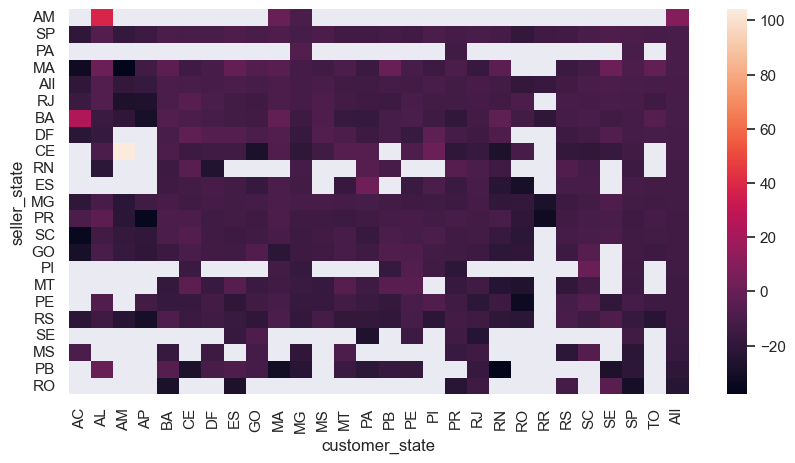

In [130]:
sns.heatmap(estimation_gap)

In [131]:
estimation_gap.describe()['All']

count    23.000000
mean    -12.891213
std       5.782018
min     -23.500000
25%     -15.061890
50%     -12.635940
75%     -11.704971
max       9.333333
Name: All, dtype: float64

In [175]:
#showing pivot table of top customer states
estimation_gap_top = order_origin[order_origin['customer_state'].isin(top_state_list)].pivot_table(values='order_estimation_time_gap', index='seller_state', columns='customer_state', aggfunc='mean', margins=True).sort_values('All', ascending=False)
estimation_gap_top

customer_state,MG,PR,RJ,SC,SP,All
seller_state,,,,,,
AM,-10.000000,NaN,NaN,NaN,NaN,-10.000000
SP,-11.891443,-12.231972,-10.375279,-10.277338,-9.320648,-10.075155
PA,-8.000000,-14.000000,NaN,NaN,-10.333333,-10.500000
RN,-12.000000,-6.000000,-10.000000,-12.000000,-14.800000,-10.923077
All,-12.443251,-12.533572,-11.203368,-10.782640,-10.309714,-10.964848
MA,-12.151515,-9.888889,-17.333333,-12.700000,-9.196850,-11.428571
RJ,-12.255700,-13.038462,-12.261883,-12.231343,-11.053376,-11.794907
ES,-12.938776,-16.312500,-11.226667,-10.923077,-12.166667,-12.230769
MG,-11.732143,-15.458824,-12.338757,-12.686411,-12.694837,-12.551528


<AxesSubplot:xlabel='customer_state', ylabel='seller_state'>

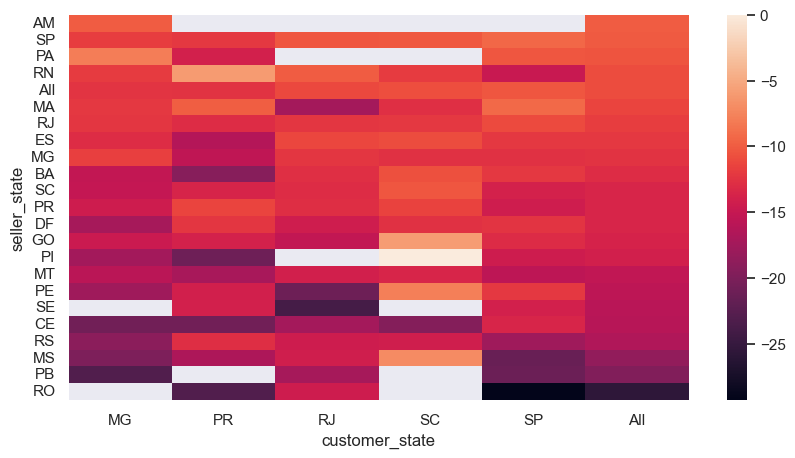

In [176]:
sns.heatmap(estimation_gap_top)

In [134]:
'''
create a pivot showing handling time per state where handling time is defined as processing time
(how long seller takes order to the carrier service) and carrier time
(how long carrier service takes order to the customer)
and show its difference to mean for each phase
'''
handling_time = order_origin[['seller_state', 'order_process_time', 'order_carrier_time']].groupby('seller_state').mean().sort_values('order_process_time', ascending=False)
handling_time['total_handling'] = handling_time['order_process_time'] + handling_time['order_carrier_time']
handling_time['%_diff_process_mean'] = handling_time['order_process_time']/handling_time['order_process_time'].mean()*100-100
handling_time['%_diff_carrier_mean'] = handling_time['order_carrier_time']/handling_time['order_carrier_time'].mean()*100-100
handling_time['%_diff_handling_mean'] = handling_time['total_handling']/handling_time['total_handling'].mean()*100-100
handling_time = handling_time[['order_process_time', '%_diff_process_mean', 'order_carrier_time', '%_diff_carrier_mean', 'total_handling', '%_diff_handling_mean']]
handling_time.sort_values('%_diff_handling_mean', ascending=False)

,order_process_time,%_diff_process_mean,order_carrier_time,%_diff_carrier_mean,total_handling,%_diff_handling_mean
seller_state,,,,,,
AM,2.666667,0.067218,44.000000,284.345436,46.666667,230.666499
MA,4.287500,60.889324,12.495000,9.145369,16.782500,18.915940
CE,2.909091,9.164238,13.565657,18.497686,16.474747,16.735294
RO,2.000000,-24.949587,14.285714,24.787479,16.285714,15.395860
MT,2.760274,3.579851,10.979452,-4.093130,13.739726,-2.644276
BA,2.997054,12.465089,9.870398,-13.780857,12.867452,-8.824957
PI,1.181818,-55.652028,11.636364,1.645074,12.818182,-9.174072
PA,3.250000,21.956922,9.375000,-18.108217,12.625000,-10.542902
SC,2.582573,-3.088406,9.935430,-13.212794,12.518003,-11.301053


<AxesSubplot:ylabel='seller_state'>

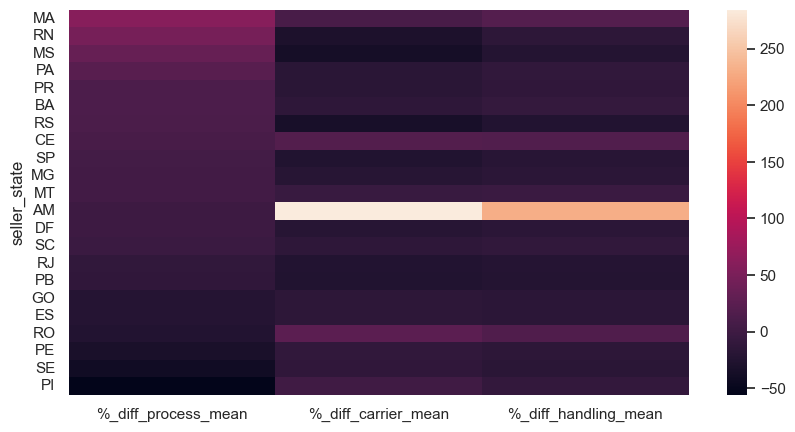

In [135]:
sns.heatmap(handling_time[['%_diff_process_mean', '%_diff_carrier_mean', '%_diff_handling_mean']])

In [136]:
order_origin['order_process_time'].describe()

count    114842.000000
mean          2.789633
std           3.642305
min        -171.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         125.000000
Name: order_process_time, dtype: float64

In [137]:
order_origin['order_carrier_time'].describe()

count    114842.000000
mean          8.712109
std           8.542296
min         -16.000000
25%           4.000000
50%           7.000000
75%          11.000000
max         205.000000
Name: order_carrier_time, dtype: float64

In [138]:
order_origin.head()

,order_id,product_id,product_category_name,customer_id,seller_id,price,freight_value,review_score,order_purchase_hr,order_purchase_day,...,order_purchase_dayofweek,order_delivery_time,order_estimation_time_gap,order_process_time,order_carrier_time,review_process_time,customer_city,customer_state,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,3ce436f183e68e07877b285a838db11a,48436dade18ac8b2bce089ec2a041202,58.9,13.29,5,8,13,...,2,7,-8,6,1,1,campos dos goytacazes,RJ,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,48436dade18ac8b2bce089ec2a041202,55.9,17.96,5,11,28,...,2,15,-12,7,8,3,jatai,GO,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,4ef55bf80f711b372afebcb7c715344a,48436dade18ac8b2bce089ec2a041202,64.9,18.33,4,10,18,...,4,17,-2,5,12,1,belo horizonte,MG,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,30407a72ad8b3f4df4d15369126b20c9,48436dade18ac8b2bce089ec2a041202,58.9,16.17,5,18,1,...,1,8,-15,1,7,3,sao jose dos pinhais,PR,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da,48436dade18ac8b2bce089ec2a041202,58.9,13.29,5,21,10,...,3,13,-7,0,13,3,conselheiro lafaiete,MG,volta redonda,SP


In [158]:
'''
show how much each category costs in each state where price is comprised of
the product price itself plus freight. Then the table shows its difference to the mean for each component
'''

price_per_cat = pd.DataFrame(order_origin.groupby(['product_category_name', 'seller_state'], as_index=False)[['price', 'freight_value']].mean())
price_per_cat['%_diff_price_median'] = price_per_cat['price']/price_per_cat['price'].median()*100-100
price_per_cat['%_diff_freight_median'] = price_per_cat['freight_value']/price_per_cat['freight_value'].median()*100-100
price_per_cat = price_per_cat[['product_category_name', 'seller_state', 'price', '%_diff_price_median', 'freight_value', '%_diff_freight_median']]
price_per_cat

,product_category_name,seller_state,price,%_diff_price_median,freight_value,%_diff_freight_median
0,agro_industria_e_comercio,MG,104.970000,27.512755,15.985000,-9.310682
1,agro_industria_e_comercio,PR,80.233394,-2.536142,23.663578,34.252972
2,agro_industria_e_comercio,RJ,54.445000,-33.862704,17.720000,0.532669
3,agro_industria_e_comercio,RS,82.321176,0.000000,20.498824,16.298050
4,agro_industria_e_comercio,SC,33.900000,-58.819831,13.720000,-22.160935
...,...,...,...,...,...,...
498,utilidades_domesticas,PR,72.736599,-11.642906,18.784645,6.572826
499,utilidades_domesticas,RJ,66.571266,-19.132271,15.358608,-12.864457
500,utilidades_domesticas,RS,96.652723,17.409307,19.102984,8.378894
501,utilidades_domesticas,SC,127.635820,55.046157,18.314683,3.906542


In [165]:
price_diff = price_per_cat.pivot_table(values='%_diff_price_median', index='product_category_name', columns='seller_state', aggfunc='mean')
price_diff

seller_state,AM,BA,CE,DF,ES,GO,MA,MG,MS,MT,...,PE,PI,PR,RJ,RN,RO,RS,SC,SE,SP
product_category_name,,,,,,,,,,,,,,,,,,,,,
agro_industria_e_comercio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.512755,NaN,NaN,...,NaN,NaN,-2.536142,-33.862704,NaN,NaN,0.000000,-58.819831,NaN,-21.573852
alimentos,NaN,NaN,2.526689,NaN,-14.967202,NaN,NaN,-5.114195,NaN,NaN,...,NaN,NaN,12.891163,-59.540585,NaN,NaN,-27.965072,-63.630257,NaN,-32.252106
alimentos_bebidas,NaN,59.712709,NaN,NaN,NaN,NaN,NaN,-46.239918,NaN,NaN,...,NaN,NaN,NaN,-53.231961,NaN,NaN,NaN,-81.900161,NaN,-52.049155
artes,NaN,NaN,NaN,191.419548,NaN,-8.905578,NaN,23.114130,NaN,NaN,...,NaN,NaN,45.132765,-20.419713,NaN,NaN,9.206408,-47.439861,NaN,5.869980
artes_e_artesanato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-69.631143,NaN,NaN,...,NaN,NaN,NaN,-73.287554,NaN,NaN,-8.905578,189.111514,NaN,-24.713782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tablets_impressao_imagem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.529118
telefonia,22.686131,89.757049,NaN,17.274309,-78.134423,NaN,NaN,22.605148,NaN,NaN,...,-75.826390,NaN,19.056250,46.014272,NaN,NaN,94.454066,28.005598,NaN,-56.718852
telefonia_fixa,NaN,35.639461,NaN,154.126592,210.977091,51.844283,NaN,27.325143,NaN,NaN,...,NaN,NaN,-71.817701,NaN,69.944121,NaN,34.821526,NaN,NaN,-23.717315


<AxesSubplot:xlabel='seller_state', ylabel='product_category_name'>

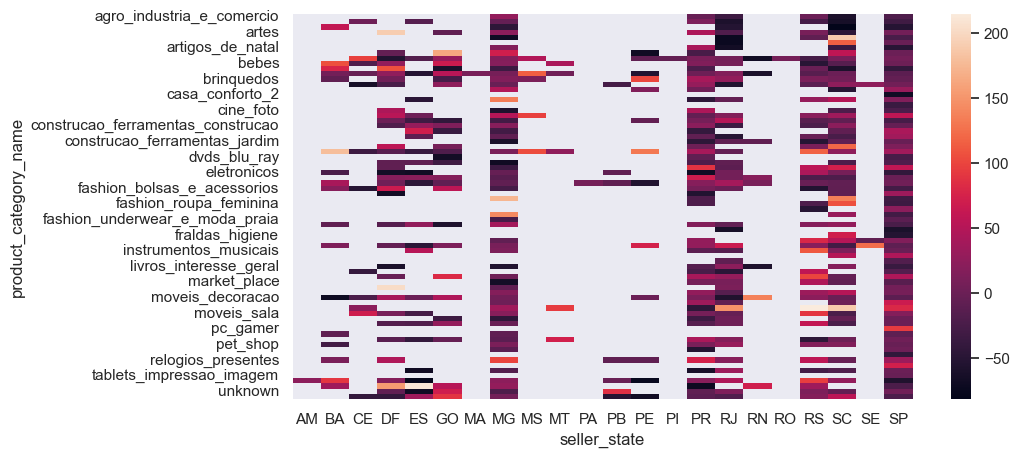

In [166]:
sns.heatmap(price_diff)

In [167]:
price_per_cat_top = price_per_cat.loc[(price_per_cat['seller_state'].isin(top_state_list) & price_per_cat['product_category_name'].isin(top_cat_list))].reset_index()
price_per_cat_top

,index,product_category_name,seller_state,price,%_diff_price_median,freight_value,%_diff_freight_median
0,87,beleza_saude,MG,89.173227,8.323557,16.586995,-5.895322
1,91,beleza_saude,PR,83.506766,1.440201,18.386557,4.314314
2,92,beleza_saude,RJ,95.451321,15.949900,16.774639,-4.830742
3,95,beleza_saude,SC,81.963321,-0.434706,18.178066,3.131460
4,96,beleza_saude,SP,73.262110,-11.004539,14.493819,-17.770748
5,111,cama_mesa_banho,MG,80.983363,-1.625115,17.565088,-0.346210
6,113,cama_mesa_banho,PR,105.517699,28.178075,21.856991,24.003480
7,114,cama_mesa_banho,RJ,36.726890,-55.385854,17.596890,-0.165783
8,116,cama_mesa_banho,SC,102.076305,23.997626,19.890315,12.845738
9,118,cama_mesa_banho,SP,86.096017,4.585504,16.098355,-8.667572


In [168]:
#showing pivot table of top seller states
price_diff_top = price_per_cat_top.pivot_table(values='%_diff_price_median', index='product_category_name', columns='seller_state', aggfunc='mean')
price_diff_top

seller_state,MG,PR,RJ,SC,SP
product_category_name,,,,,
beleza_saude,8.323557,1.440201,15.949900,-0.434706,-11.004539
cama_mesa_banho,-1.625115,28.178075,-55.385854,23.997626,4.585504
esporte_lazer,-8.858324,18.380314,39.434092,-7.326724,2.783067
informatica_acessorios,9.395271,27.781160,66.093159,-30.733943,-9.472739
moveis_decoracao,4.232884,10.181144,-56.586281,-1.138509,-10.460505


<AxesSubplot:xlabel='seller_state', ylabel='product_category_name'>

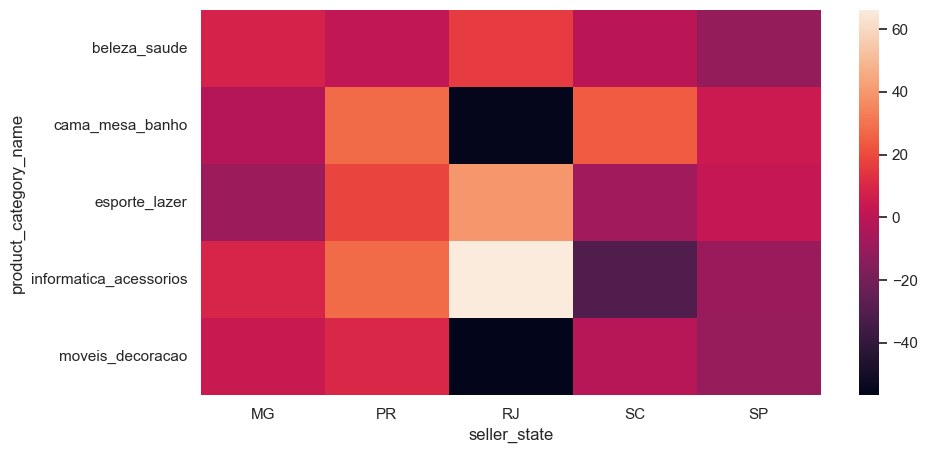

In [169]:
sns.heatmap(price_diff_top)

In [144]:
freight_diff = price_per_cat.pivot_table(values='%_diff_freight_median', index='product_category_name', columns='seller_state', aggfunc='mean')
freight_diff

seller_state,AM,BA,CE,DF,ES,GO,MA,MG,MS,MT,...,PE,PI,PR,RJ,RN,RO,RS,SC,SE,SP
product_category_name,,,,,,,,,,,,,,,,,,,,,
agro_industria_e_comercio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.310682,NaN,NaN,...,NaN,NaN,34.252972,0.532669,NaN,NaN,16.298050,-22.160935,NaN,-2.033415
alimentos,NaN,NaN,9.950515,NaN,32.133514,NaN,NaN,-11.910991,NaN,NaN,...,NaN,NaN,20.767800,-12.686355,NaN,NaN,-29.025751,-0.587827,NaN,-26.106012
alimentos_bebidas,NaN,14.963371,NaN,NaN,NaN,NaN,NaN,-0.994341,NaN,NaN,...,NaN,NaN,NaN,-54.953194,NaN,NaN,NaN,-3.958773,NaN,-17.168998
artes,NaN,NaN,NaN,-47.464305,NaN,-7.750496,NaN,13.604186,NaN,NaN,...,NaN,NaN,29.864154,-16.763099,NaN,NaN,31.679642,-8.246919,NaN,-7.456974
artes_e_artesanato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-50.698144,NaN,NaN,...,NaN,NaN,NaN,-56.485013,NaN,NaN,40.870552,-7.750496,NaN,-26.183377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tablets_impressao_imagem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.148840
telefonia,18.763199,13.091577,NaN,-10.204242,-20.005043,NaN,NaN,-11.718177,NaN,NaN,...,18.006745,NaN,3.645215,1.678696,NaN,NaN,14.648801,-2.153078,NaN,-20.738790
telefonia_fixa,NaN,20.313928,NaN,28.718127,15.099127,-7.750496,NaN,-2.184259,NaN,NaN,...,NaN,NaN,-7.939610,NaN,-7.750496,NaN,-2.310335,NaN,NaN,-11.412819


<AxesSubplot:xlabel='seller_state', ylabel='product_category_name'>

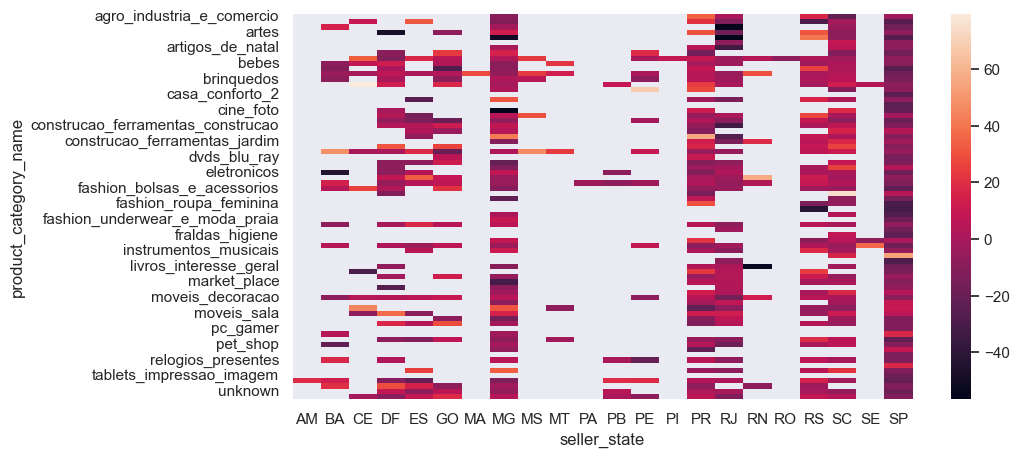

In [145]:
sns.heatmap(freight_diff)

In [170]:
#showing pivot table of top seller states
freight_diff_top = price_per_cat_top.pivot_table(values='%_diff_freight_median', index='product_category_name', columns='seller_state', aggfunc='mean')
freight_diff_top

seller_state,MG,PR,RJ,SC,SP
product_category_name,,,,,
beleza_saude,-5.895322,4.314314,-4.830742,3.131460,-17.770748
cama_mesa_banho,-0.346210,24.003480,-0.165783,12.845738,-8.667572
esporte_lazer,-4.608794,2.935307,-5.671217,2.496043,-12.665389
informatica_acessorios,-3.667225,-8.907843,-2.103452,-4.697632,-18.126206
moveis_decoracao,5.157855,5.598519,-16.530334,1.332401,-9.458591


<AxesSubplot:xlabel='seller_state', ylabel='product_category_name'>

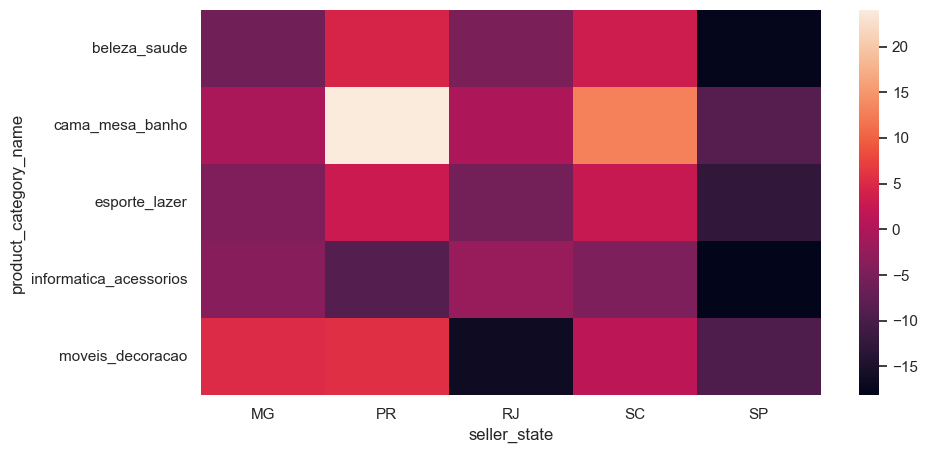

In [171]:
sns.heatmap(freight_diff_top)

In [95]:
'''
showing how customers from each state give reviews to sellers from each state
'''
review_time = order_origin.pivot_table(values='review_process_time', index='seller_state', columns='customer_state', aggfunc='mean', margins=True).sort_values('All', ascending=False)
review_time

customer_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,All
seller_state,,,,,,,,,,,,,,,,,,,,,
RO,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,...,1.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,15.714286,NaN,8.785714
MS,1.000000,NaN,NaN,NaN,4.583333,NaN,3.000000,NaN,3.000000,NaN,...,33.888889,NaN,NaN,NaN,1.000000,2.000000,NaN,1.947368,NaN,8.152542
PI,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,1.500000,NaN,5.818182
MT,NaN,NaN,NaN,NaN,1.000000,0.500000,28.142857,2.333333,2.454545,2.000000,...,2.071429,0.000000,2.666667,NaN,1.666667,2.333333,NaN,4.735294,NaN,4.342466
RS,1.000000,16.300000,1.857143,1.750000,21.857143,2.133333,1.580000,1.892857,1.538462,2.823529,...,4.079422,2.222222,2.000000,NaN,2.046012,5.613636,2.750000,2.437340,3.500000,3.300312
DF,1.000000,1.500000,NaN,NaN,2.225000,8.214286,3.126984,6.230769,2.305556,1.636364,...,2.160377,66.625000,NaN,NaN,3.086957,0.703704,0.666667,2.121387,2.666667,3.011815
PB,NaN,0.000000,NaN,NaN,1.500000,8.222222,2.000000,2.000000,3.000000,1.000000,...,1.250000,0.000000,NaN,NaN,NaN,NaN,2.000000,1.555556,NaN,2.857143
SC,1.400000,2.363636,3.500000,3.750000,2.518519,2.086957,3.226667,1.830189,1.812500,5.363636,...,2.697632,5.714286,1.111111,NaN,3.026316,2.629508,4.352941,2.957935,2.166667,2.849256
RJ,1.000000,1.142857,2.125000,4.000000,2.250000,1.431034,2.853448,2.654867,2.290076,2.333333,...,2.587444,2.875000,2.692308,NaN,1.833333,2.686567,1.526316,3.123473,2.000000,2.716255


<AxesSubplot:xlabel='customer_state', ylabel='seller_state'>

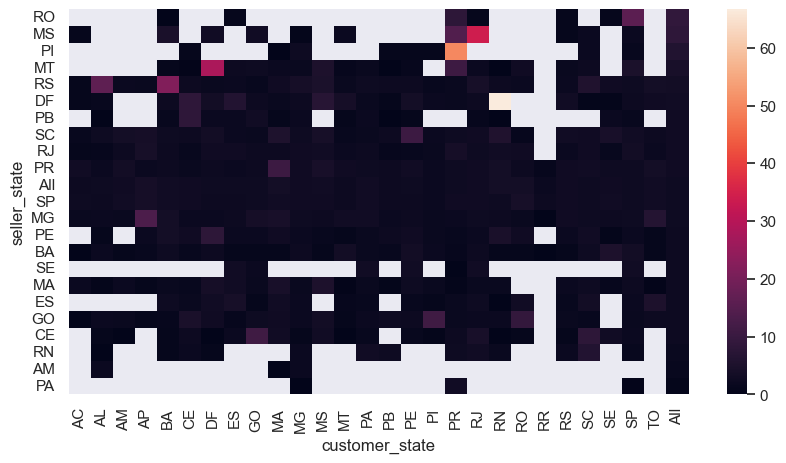

In [96]:
sns.heatmap(review_time)

In [177]:
#showing pivot table of top seller and customer states
review_time_top = order_origin[(order_origin['seller_state'].isin(top_state_list)) & (order_origin['customer_state'].isin(top_state_list))].pivot_table(values='review_process_time', index='seller_state', columns='customer_state', aggfunc='mean', margins=True).sort_values('All', ascending=False)
review_time_top

customer_state,MG,PR,RJ,SC,SP,All
seller_state,,,,,,
RJ,2.690554,3.756410,2.587444,2.686567,3.123473,2.911555
SC,2.570565,2.450450,2.697632,2.629508,2.957935,2.772140
PR,2.847849,2.547215,2.841645,2.902597,2.410842,2.592103
All,2.683941,2.588014,2.693706,2.493952,2.463350,2.546048
SP,2.714814,2.610286,2.702837,2.394964,2.422763,2.519114
MG,2.465438,1.934118,2.588018,2.560976,2.423874,2.442187


<AxesSubplot:xlabel='customer_state', ylabel='seller_state'>

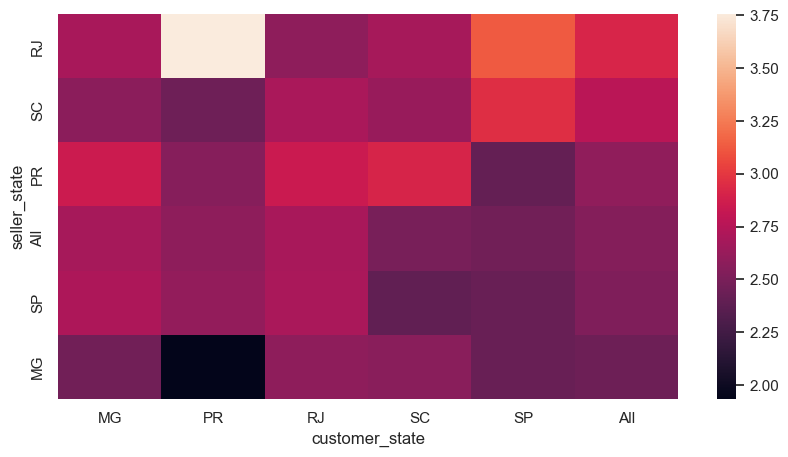

In [178]:
sns.heatmap(review_time_top)

In [179]:
review_score = order_origin.pivot_table(values='order_id', index='seller_state', columns='review_score', aggfunc='count', margins=True).sort_values('All', ascending=False).drop(['All'])
review_score

review_score,3,4,5,All
seller_state,,,,
SP,7105.0,15793.0,59028.0,81926
MG,751.0,1795.0,6458.0,9004
PR,687.0,1669.0,6459.0,8815
RJ,333.0,839.0,3688.0,4860
SC,324.0,793.0,3049.0,4166
RS,166.0,441.0,1634.0,2241
DF,79.0,172.0,680.0,931
BA,50.0,182.0,447.0,679
GO,30.0,111.0,395.0,536


<AxesSubplot:xlabel='review_score', ylabel='seller_state'>

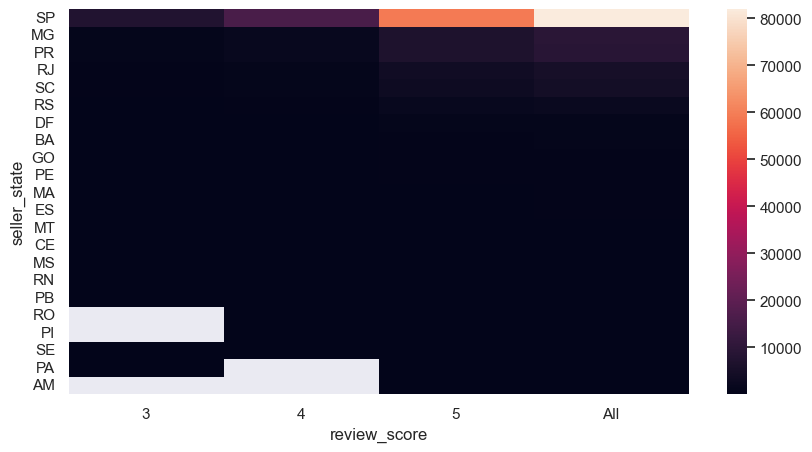

In [180]:
sns.heatmap(review_score)

In [181]:
#showing pivot table of top seller states (who get the best reviews)
review_score_top = order_origin[(order_origin['seller_state'].isin(top_state_list)) & (order_origin['customer_state'].isin(top_state_list))].pivot_table(values='order_id', index='seller_state', columns='review_score', aggfunc='count', margins=True).sort_values('All', ascending=False).drop(['All'])
review_score_top

review_score,3,4,5,All
seller_state,,,,
SP,5262,11664,45332,62258
PR,522,1328,5039,6889
MG,576,1372,4893,6841
RJ,238,608,2806,3652
SC,240,611,2401,3252


<AxesSubplot:xlabel='review_score', ylabel='seller_state'>

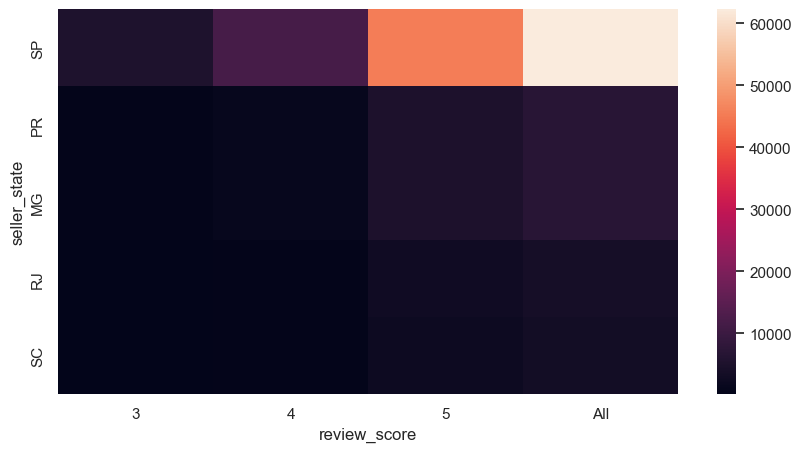

In [182]:
sns.heatmap(review_score_top)